In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# Data Overview

In [2]:
df = pd.read_csv('updated_pollution_dataset.csv')
df.head(20)

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0          29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1          28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2          23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3          27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4          26.5      70.7    6.9  16.0  21.9   5.6  1.01   
5          39.4      96.6   14.6  35.5  42.9  17.9  1.82   
6          41.7      82.5    1.7  15.8  31.1  12.7  1.80   
7          31.0      59.6    5.0  16.8  24.2  13.6  1.38   
8          29.4      93.8   10.3  22.7  45.1  11.8  2.03   
9          33.2      80.5   11.1  24.4  32.0  15.3  1.69   
10         26.3      65.7    1.3   5.5  18.3   5.9  0.85   
11         32.5      51.2    1.6  10.5  21.6  19.3  1.53   
12         20.0      53.3    3.7  12.9  26.1   6.6  1.09   
13         28.6      53.7   28.9  34.0  23.2   4.5  1.02   
14         22.3      80.5    4.5  12.0  17.2   6.3  1.18   
15         32.0      78.9   22.4  29.9  27.5  11.8  1.48   
16         22.9      75.4    4.5  10.4  18.4   3.7  0.96   
17         37.6      81.2   28.1  56.6  46.7  13.7  1.85   
18         34.7      59.3    9.0  15.7  28.5   7.1  1.52   
19         37.8      97.2    0.6  24.6  37.1  11.7  1.13   

    Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                             6.3                 319    Moderate  
1                             6.0                 611    Moderate  
2                             5.2                 619    Moderate  
3                            11.1                 551        Good  
4                            12.7                 303        Good  
5                             3.1                 674   Hazardous  
6                             4.6                 735        Poor  
7                             6.3                 443    Moderate  
8                             5.4                 486        Poor  
9                             4.9                 535        Poor  
10                           13.0                 529        Good  
11                            5.9                 519    Moderate  
12                           10.2                 538        Good  
13                           11.0                 508        Good  
14                           10.4                 232        Good  
15                            7.9                 444    Moderate  
16                           14.4                 359        Good  
17                            4.1                 560        Poor  
18                            6.1                 437    Moderate  
19                            7.7                 803        Poor

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [4]:
df.describe()

Temperature     Humidity        PM2.5         PM10          NO2  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     30.029020    70.056120    20.142140    30.218360    26.412100   
std       6.720661    15.863577    24.554546    27.349199     8.895356   
min      13.400000    36.000000     0.000000    -0.200000     7.400000   
25%      25.100000    58.300000     4.600000    12.300000    20.100000   
50%      29.000000    69.800000    12.000000    21.700000    25.300000   
75%      34.000000    80.300000    26.100000    38.100000    31.900000   
max      58.600000   128.100000   295.000000   315.800000    64.900000   

               SO2           CO  Proximity_to_Industrial_Areas  \
count  5000.000000  5000.000000                    5000.000000   
mean     10.014820     1.500354                       8.425400   
std       6.750303     0.546027                       3.610944   
min      -6.200000     0.650000                       2.500000   
25%       5.100000     1.030000                       5.400000   
50%       8.000000     1.410000                       7.900000   
75%      13.725000     1.840000                      11.100000   
max      44.900000     3.720000                      25.800000   

       Population_Density  
count         5000.000000  
mean           497.423800  
std            152.754084  
min            188.000000  
25%            381.000000  
50%            494.000000  
75%            600.000000  
max            957.000000

# Data Visualization and Analysis

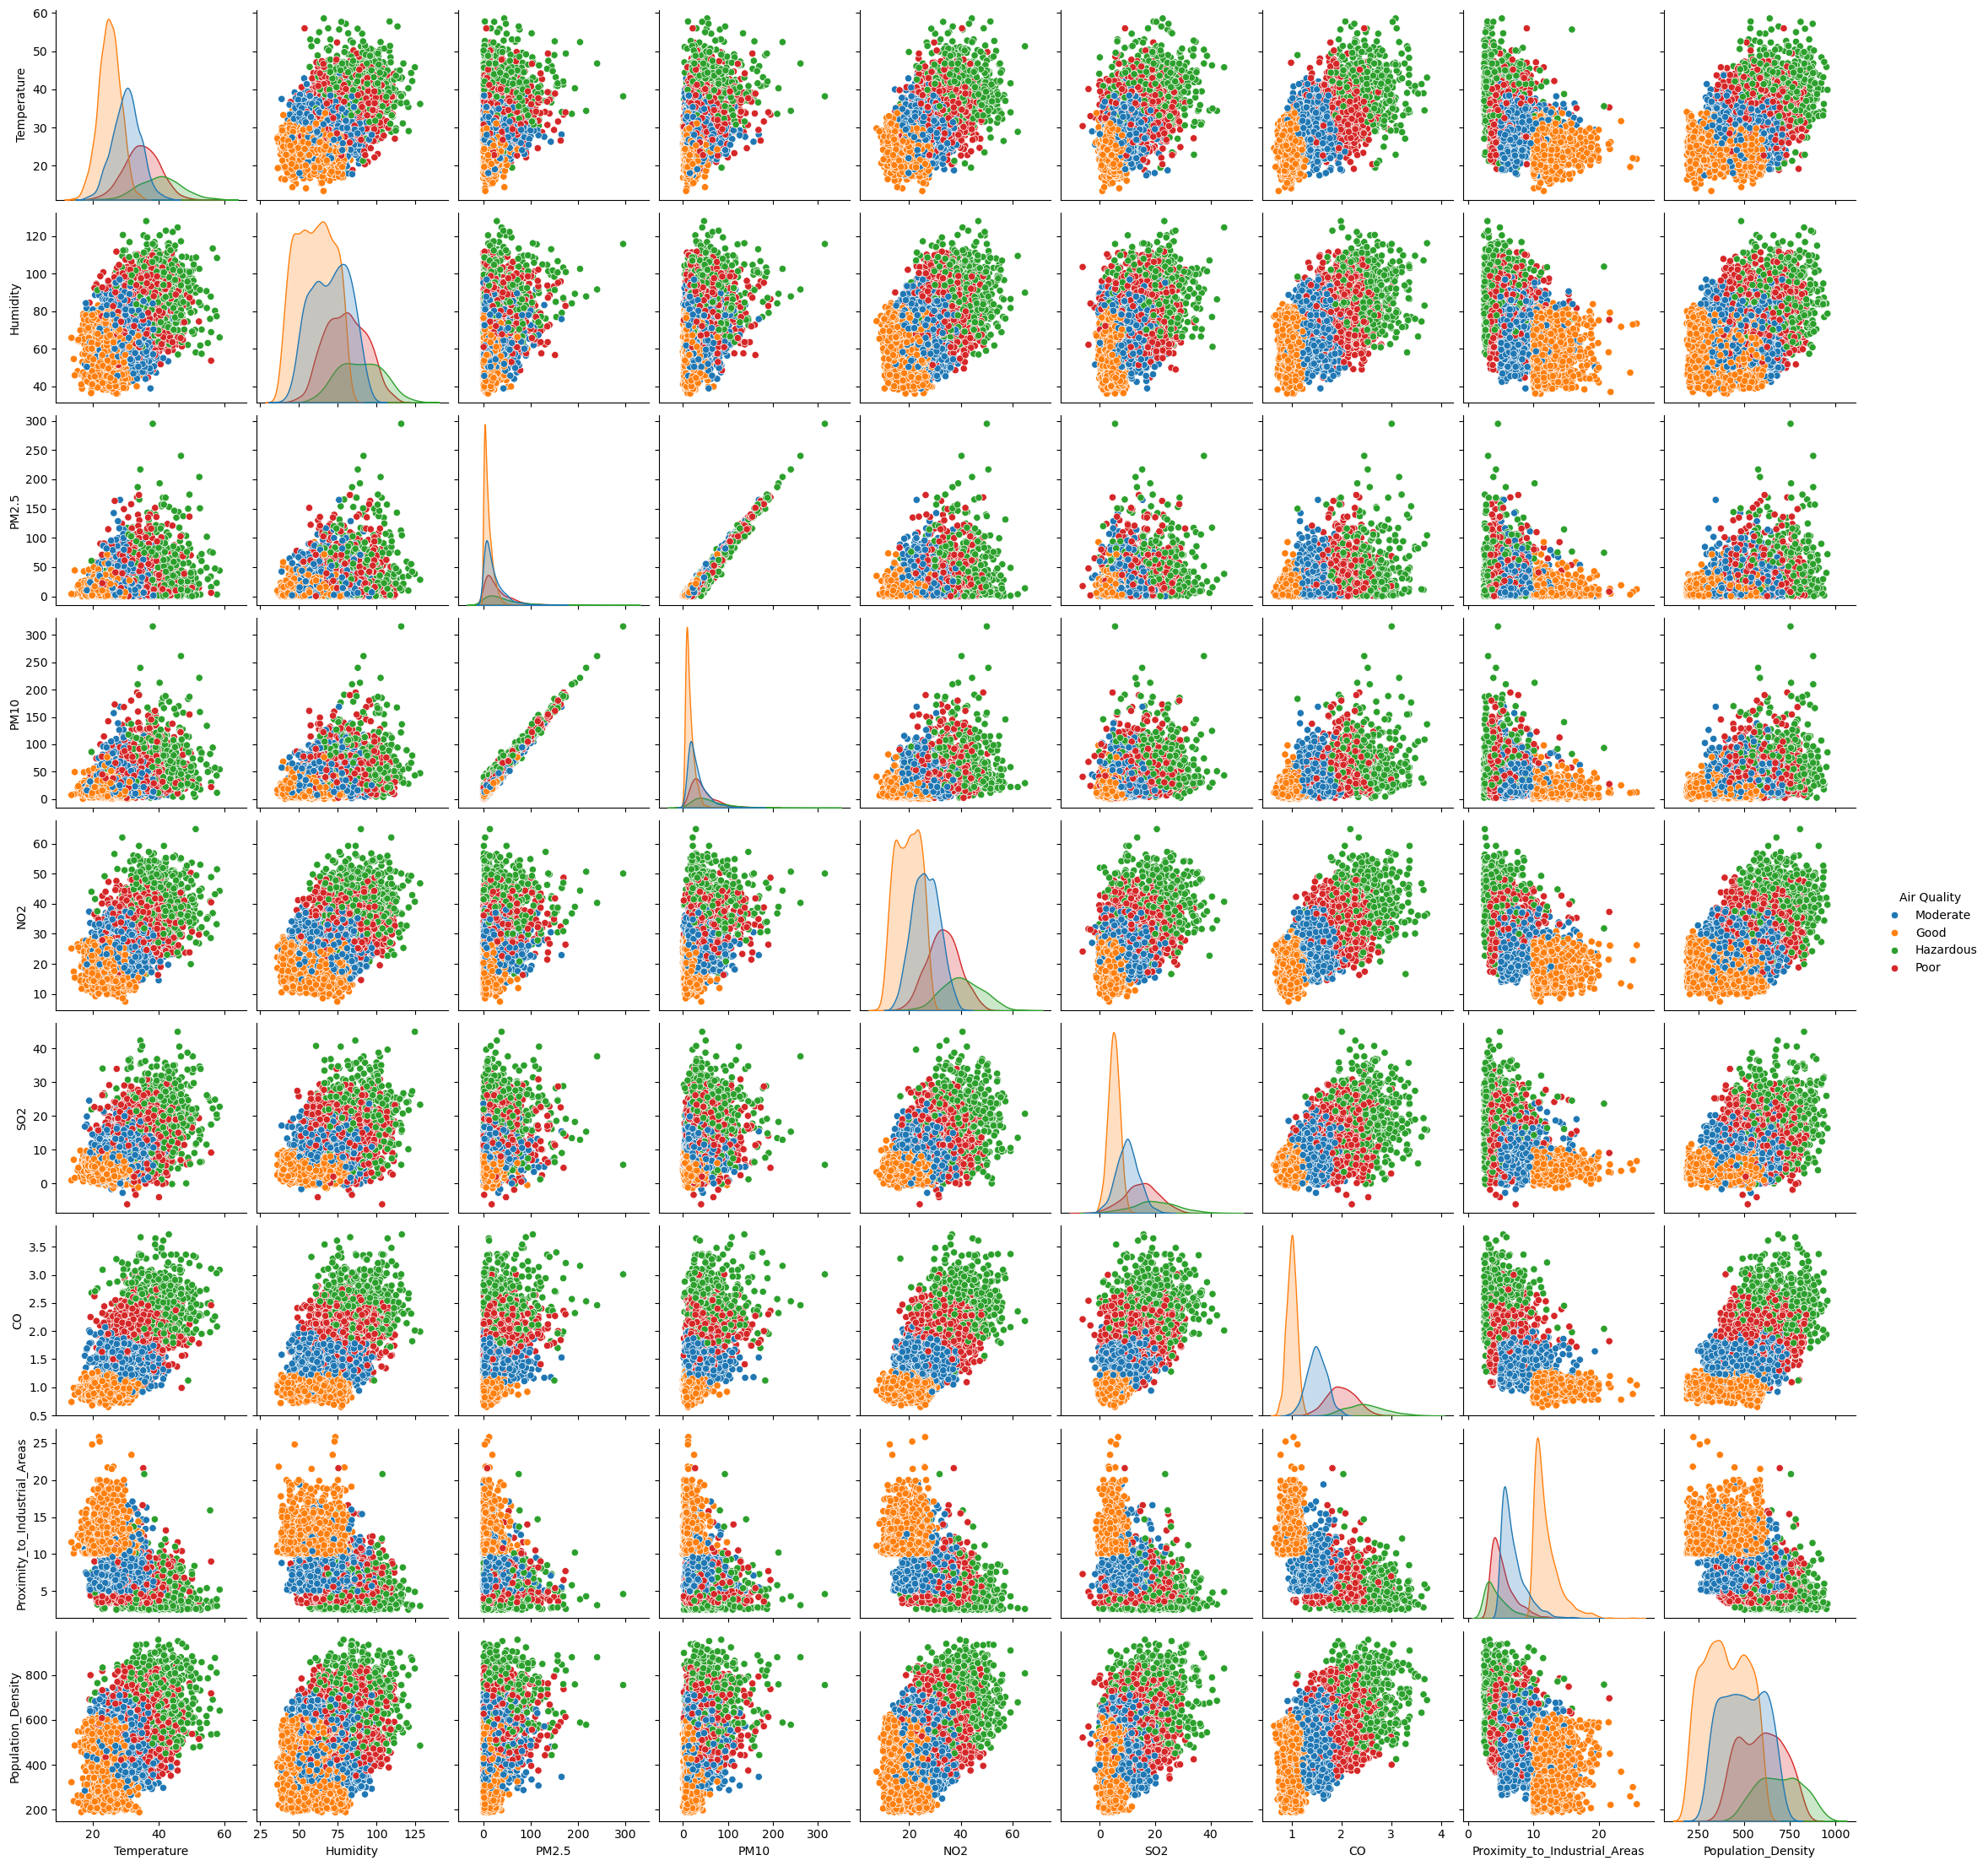

In [5]:
sns.pairplot(df, hue='Air Quality')
plt.show()

In [6]:
cols = df.drop(columns='Air Quality').columns
num_cols = len(cols)
num_rows = -(-num_cols // 3)

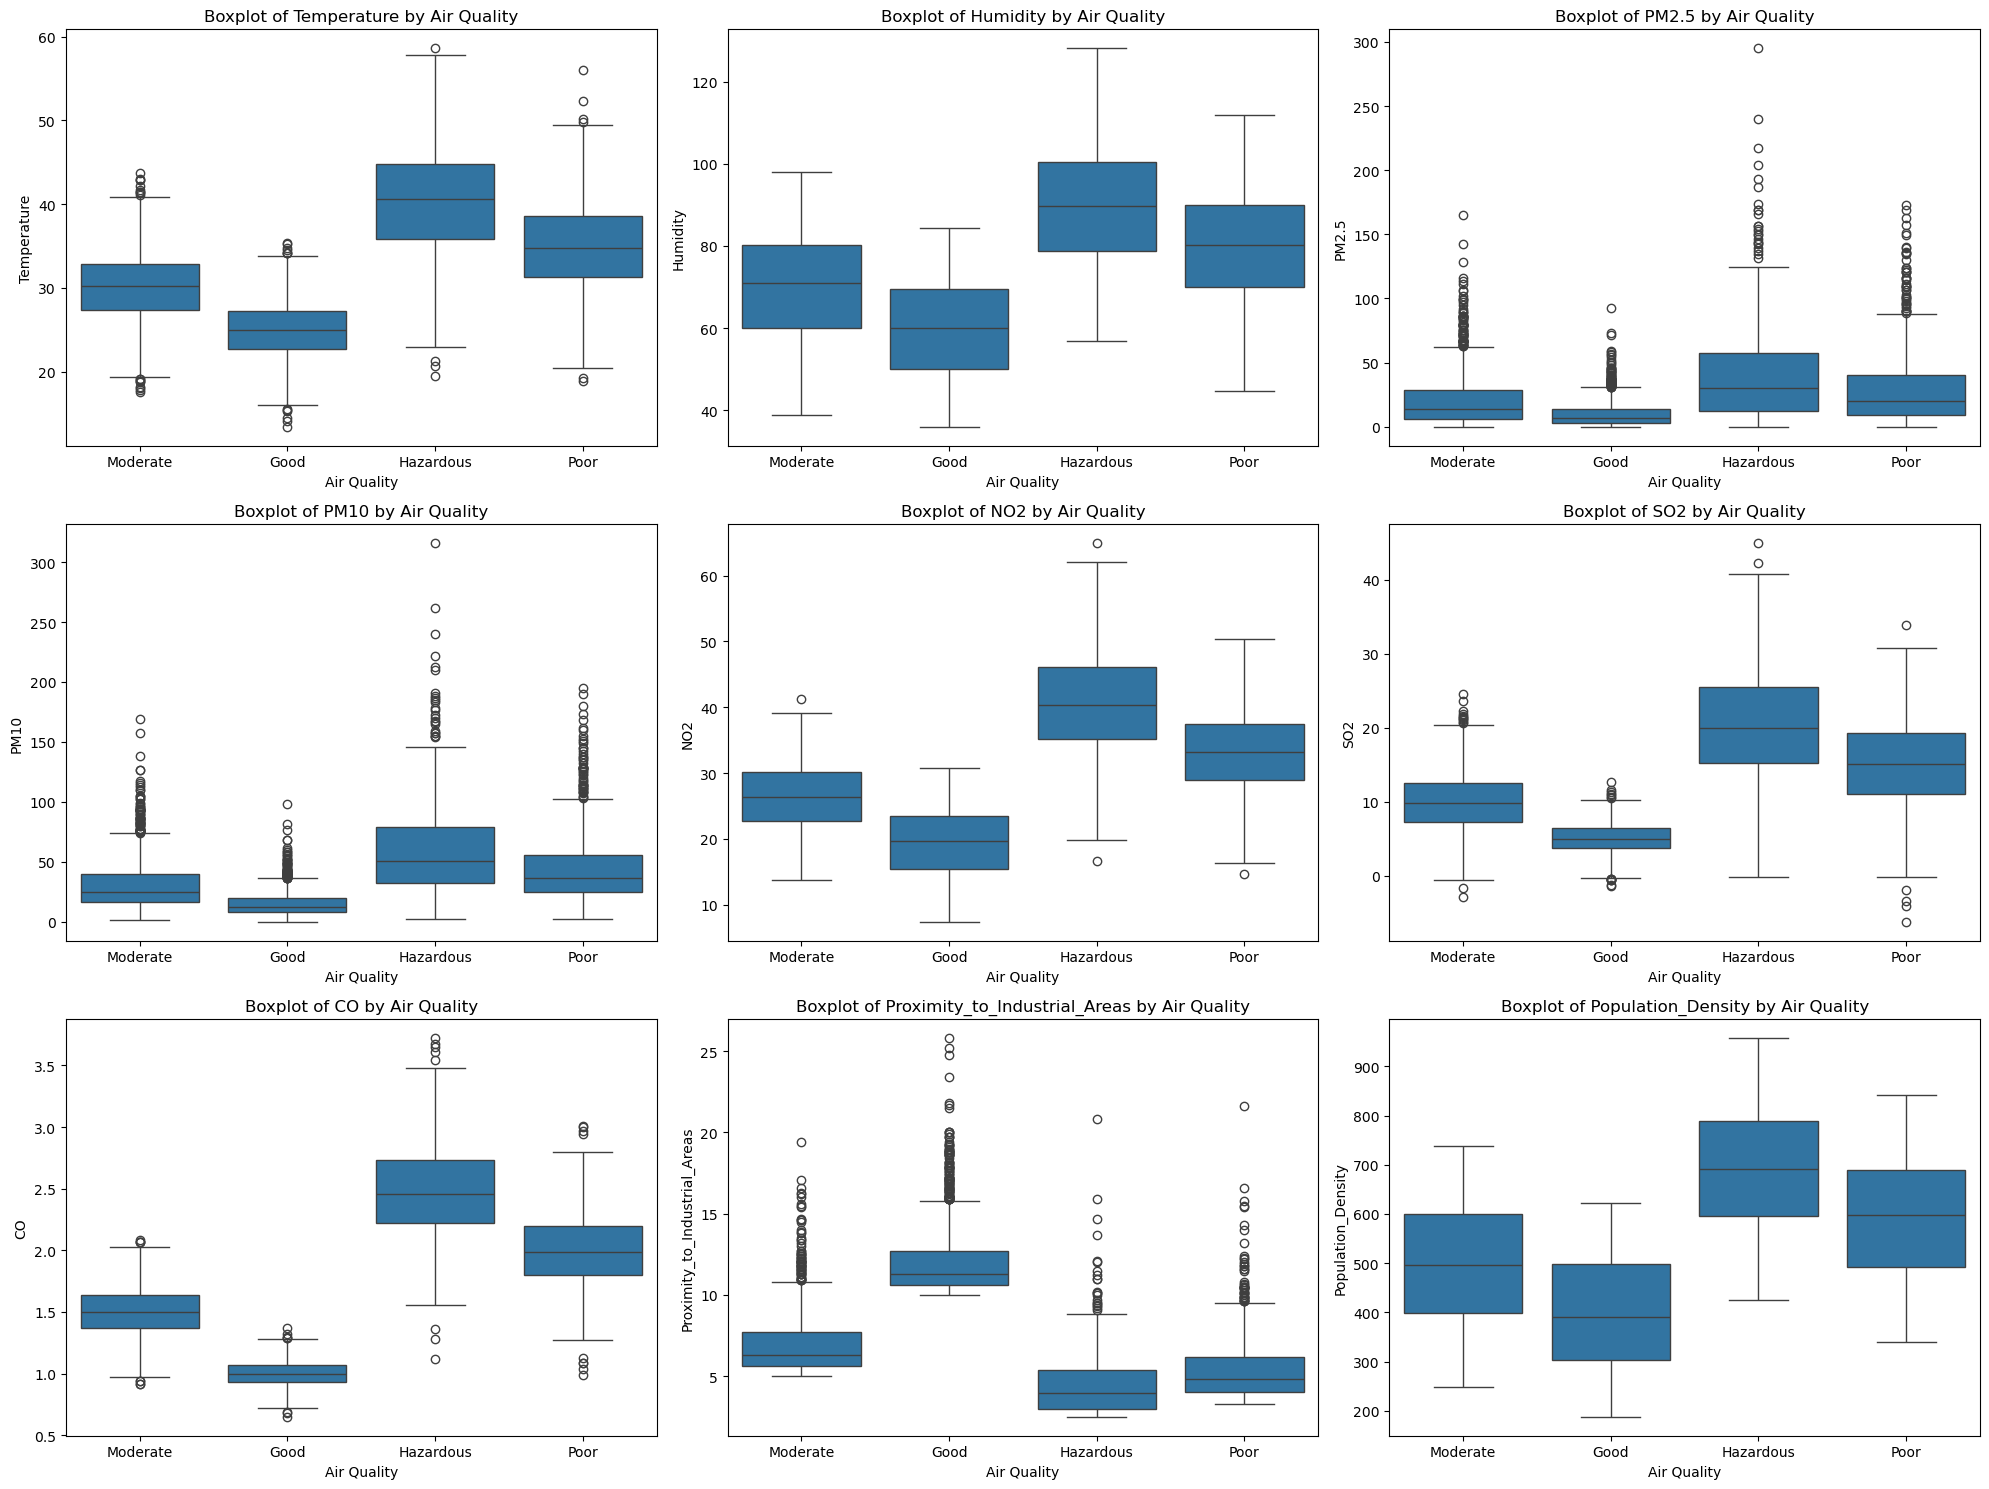

In [7]:
fig, ax = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
ax = ax.flatten()

for i, col in enumerate(cols):
    sns.boxplot(data=df, x='Air Quality', y=col, ax=ax[i])
    ax[i].set_title(f'Boxplot of {col} by Air Quality')
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])
    
plt.tight_layout()
plt.show()

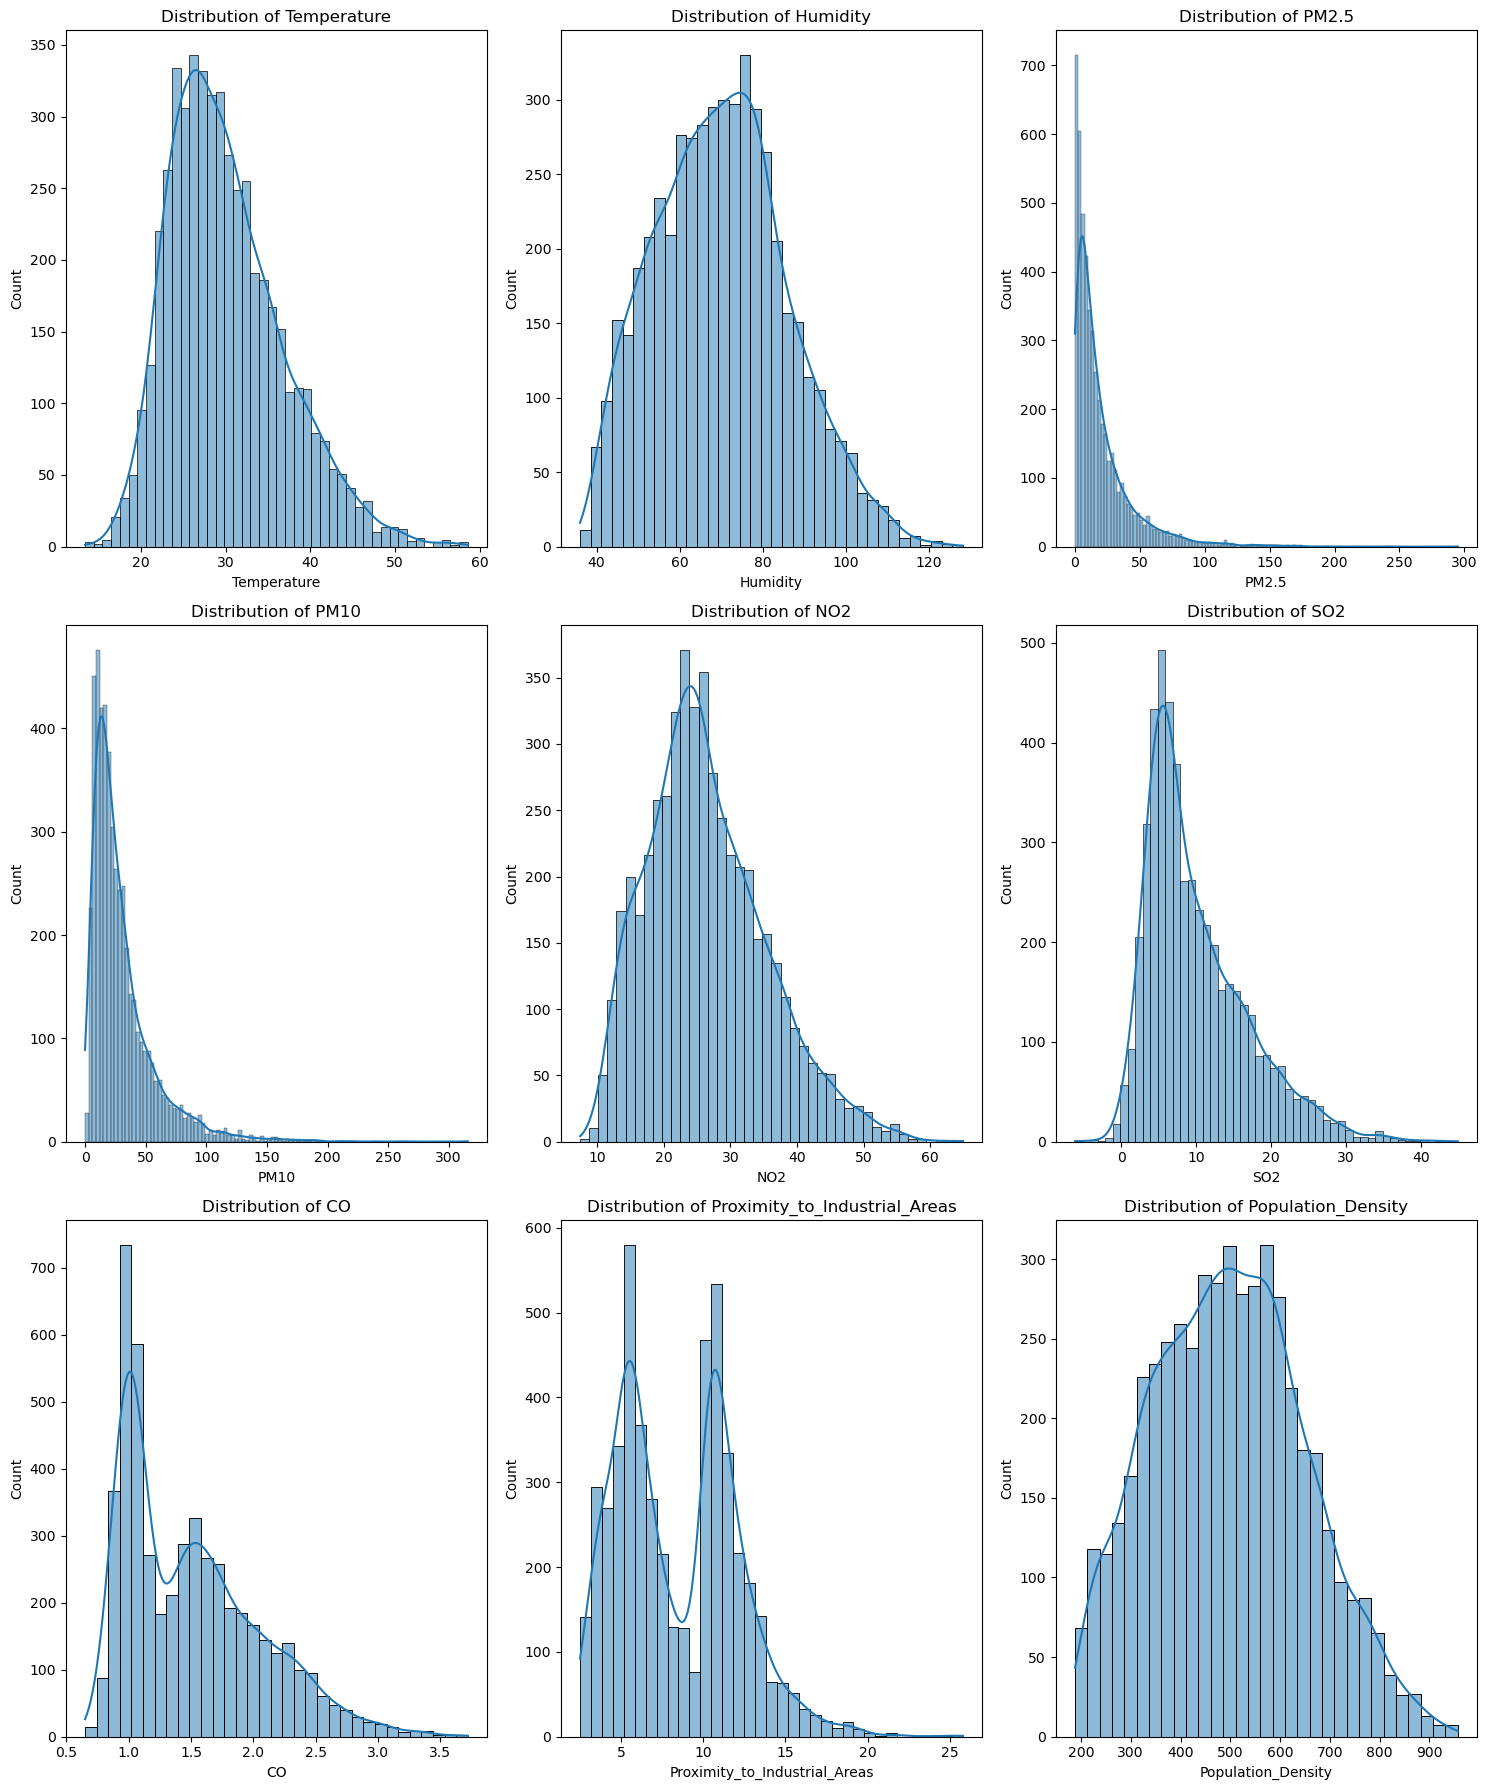

In [8]:
plt.figure(figsize=(15, 6 * num_rows))
for i, column in enumerate(cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

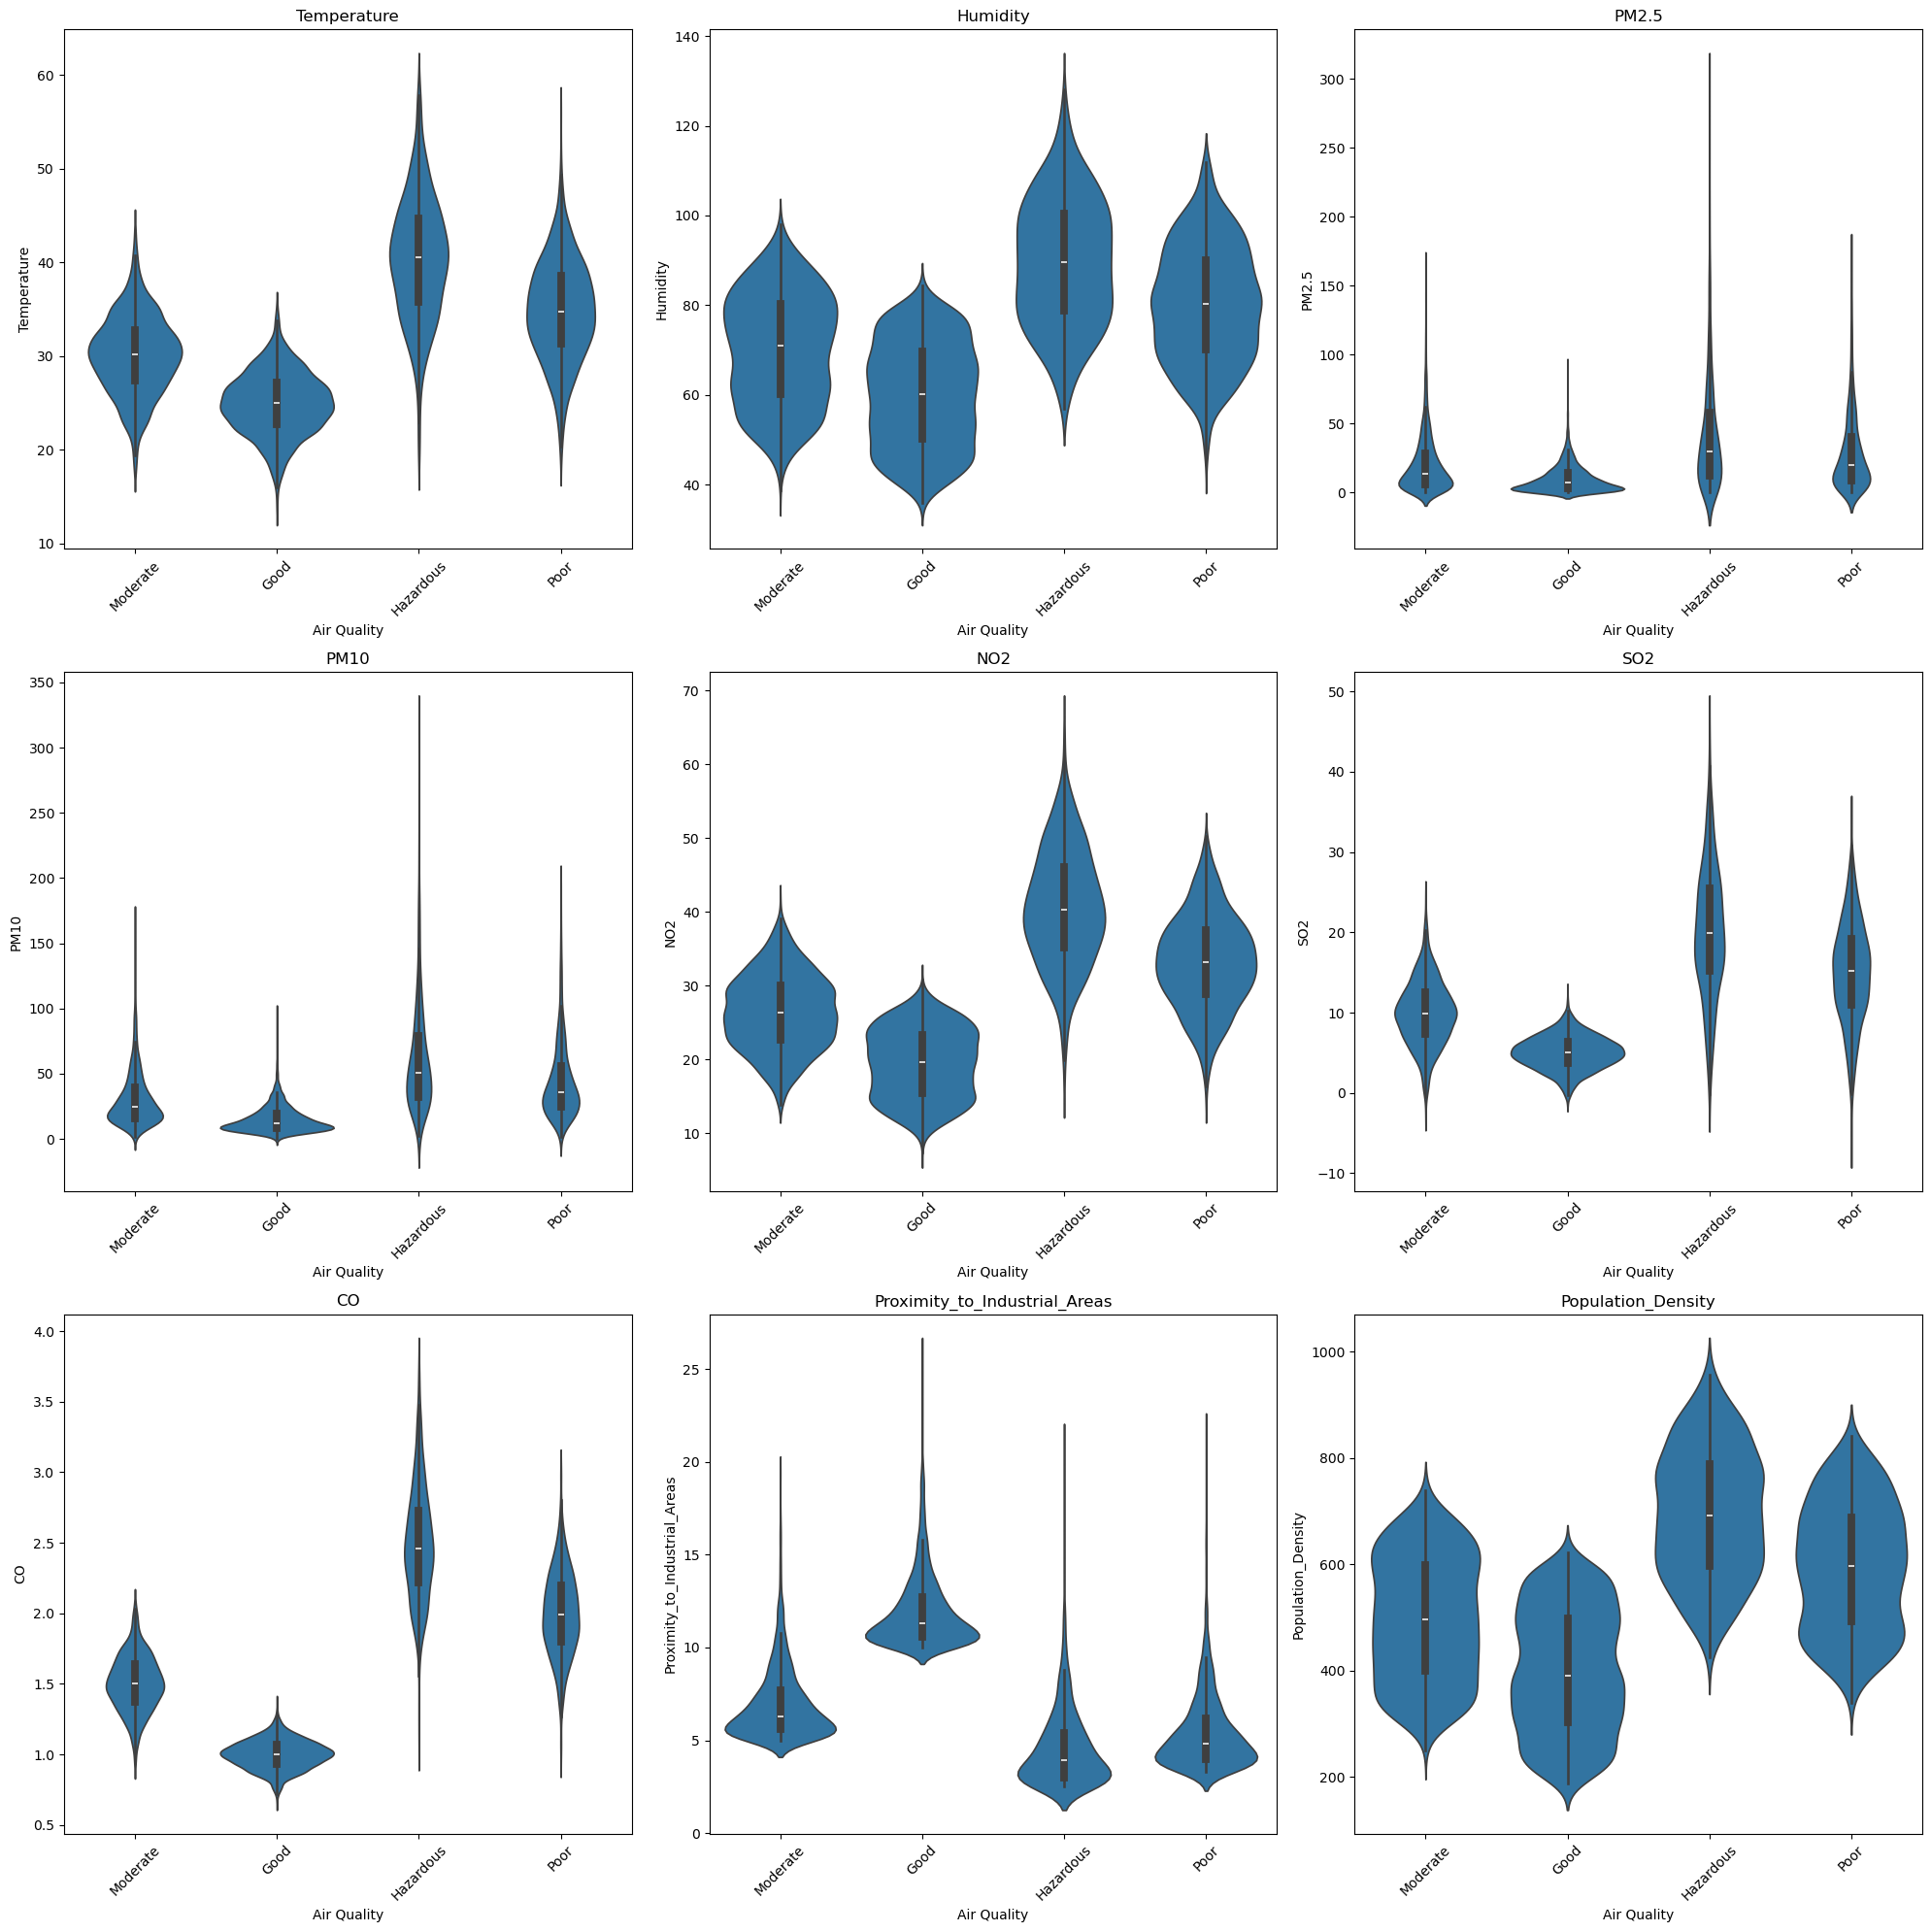

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.ravel()

for idx, col in enumerate(cols):
    sns.violinplot(data=df, y=col, x='Air Quality', ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

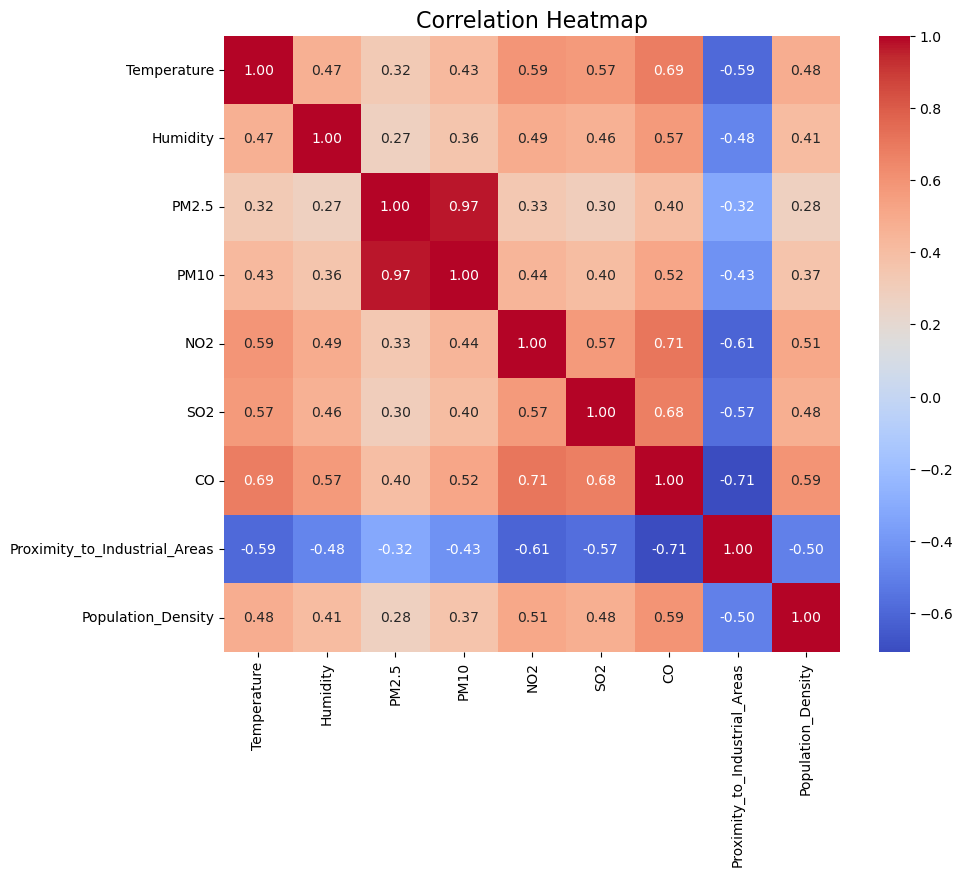

In [10]:
correlation_matrix = df.drop(columns='Air Quality').corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Data Cleansing

## Completeness

In [11]:
df.notnull().all()

Temperature                      True
Humidity                         True
PM2.5                            True
PM10                             True
NO2                              True
SO2                              True
CO                               True
Proximity_to_Industrial_Areas    True
Population_Density               True
Air Quality                      True
dtype: bool

## Missing Values

In [12]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

## Duplicates

In [13]:
df.duplicated().sum()

0

In [14]:
df[df.duplicated()]

Empty DataFrame
Columns: [Temperature, Humidity, PM2.5, PM10, NO2, SO2, CO, Proximity_to_Industrial_Areas, Population_Density, Air Quality]
Index: []

## Remove Outliers

In [15]:
dropped_rows = []

for col in df.drop(columns='Air Quality').columns:
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1
    lb = q1 - iqr * 1.5
    ub = q3 + iqr * 1.5
    
    dropped = df[(df[col] < lb) | (df[col] > ub)]
    dropped_rows.append(dropped)

    df = df[(df[col] >= lb) & (df[col] <= ub)]

dropped_df = pd.concat(dropped_rows)
dropped_df

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
29           52.5      83.9   67.5  91.2  31.6  34.6  2.31   
55           48.1      94.1    4.2  19.0  23.7   6.0  1.57   
67           58.6      66.0   44.0  54.0  44.3  22.7  3.09   
106          49.6      87.5   81.9  87.0  40.4  18.4  2.14   
249          50.9      79.9   22.5  52.0  38.2   9.0  2.65   
...           ...       ...    ...   ...   ...   ...   ...   
136          33.4      85.5   11.7  31.7  41.7  12.4  2.03   
267          40.2      91.9   22.3  34.2  43.7  17.4  2.07   
1050         47.2      76.9    1.5  27.0  34.4  20.2  2.45   
1431         40.0      83.4    5.0  25.6  45.0  14.5  2.40   
2375         43.7      83.8   14.1  54.0  41.9  20.5  2.47   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  
29                              2.9                 785   Hazardous  
55                              6.0                 625        Poor  
67                              5.2                 641   Hazardous  
106                             2.9                 631   Hazardous  
249                             8.4                 611   Hazardous  
...                             ...                 ...         ...  
136                             3.0                 927   Hazardous  
267                             3.1                 900   Hazardous  
1050                            6.0                 939   Hazardous  
1431                            4.7                 927   Hazardous  
2375                            2.9                 914   Hazardous  

[842 rows x 10 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4158 non-null   float64
 1   Humidity                       4158 non-null   float64
 2   PM2.5                          4158 non-null   float64
 3   PM10                           4158 non-null   float64
 4   NO2                            4158 non-null   float64
 5   SO2                            4158 non-null   float64
 6   CO                             4158 non-null   float64
 7   Proximity_to_Industrial_Areas  4158 non-null   float64
 8   Population_Density             4158 non-null   int64  
 9   Air Quality                    4158 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 357.3+ KB


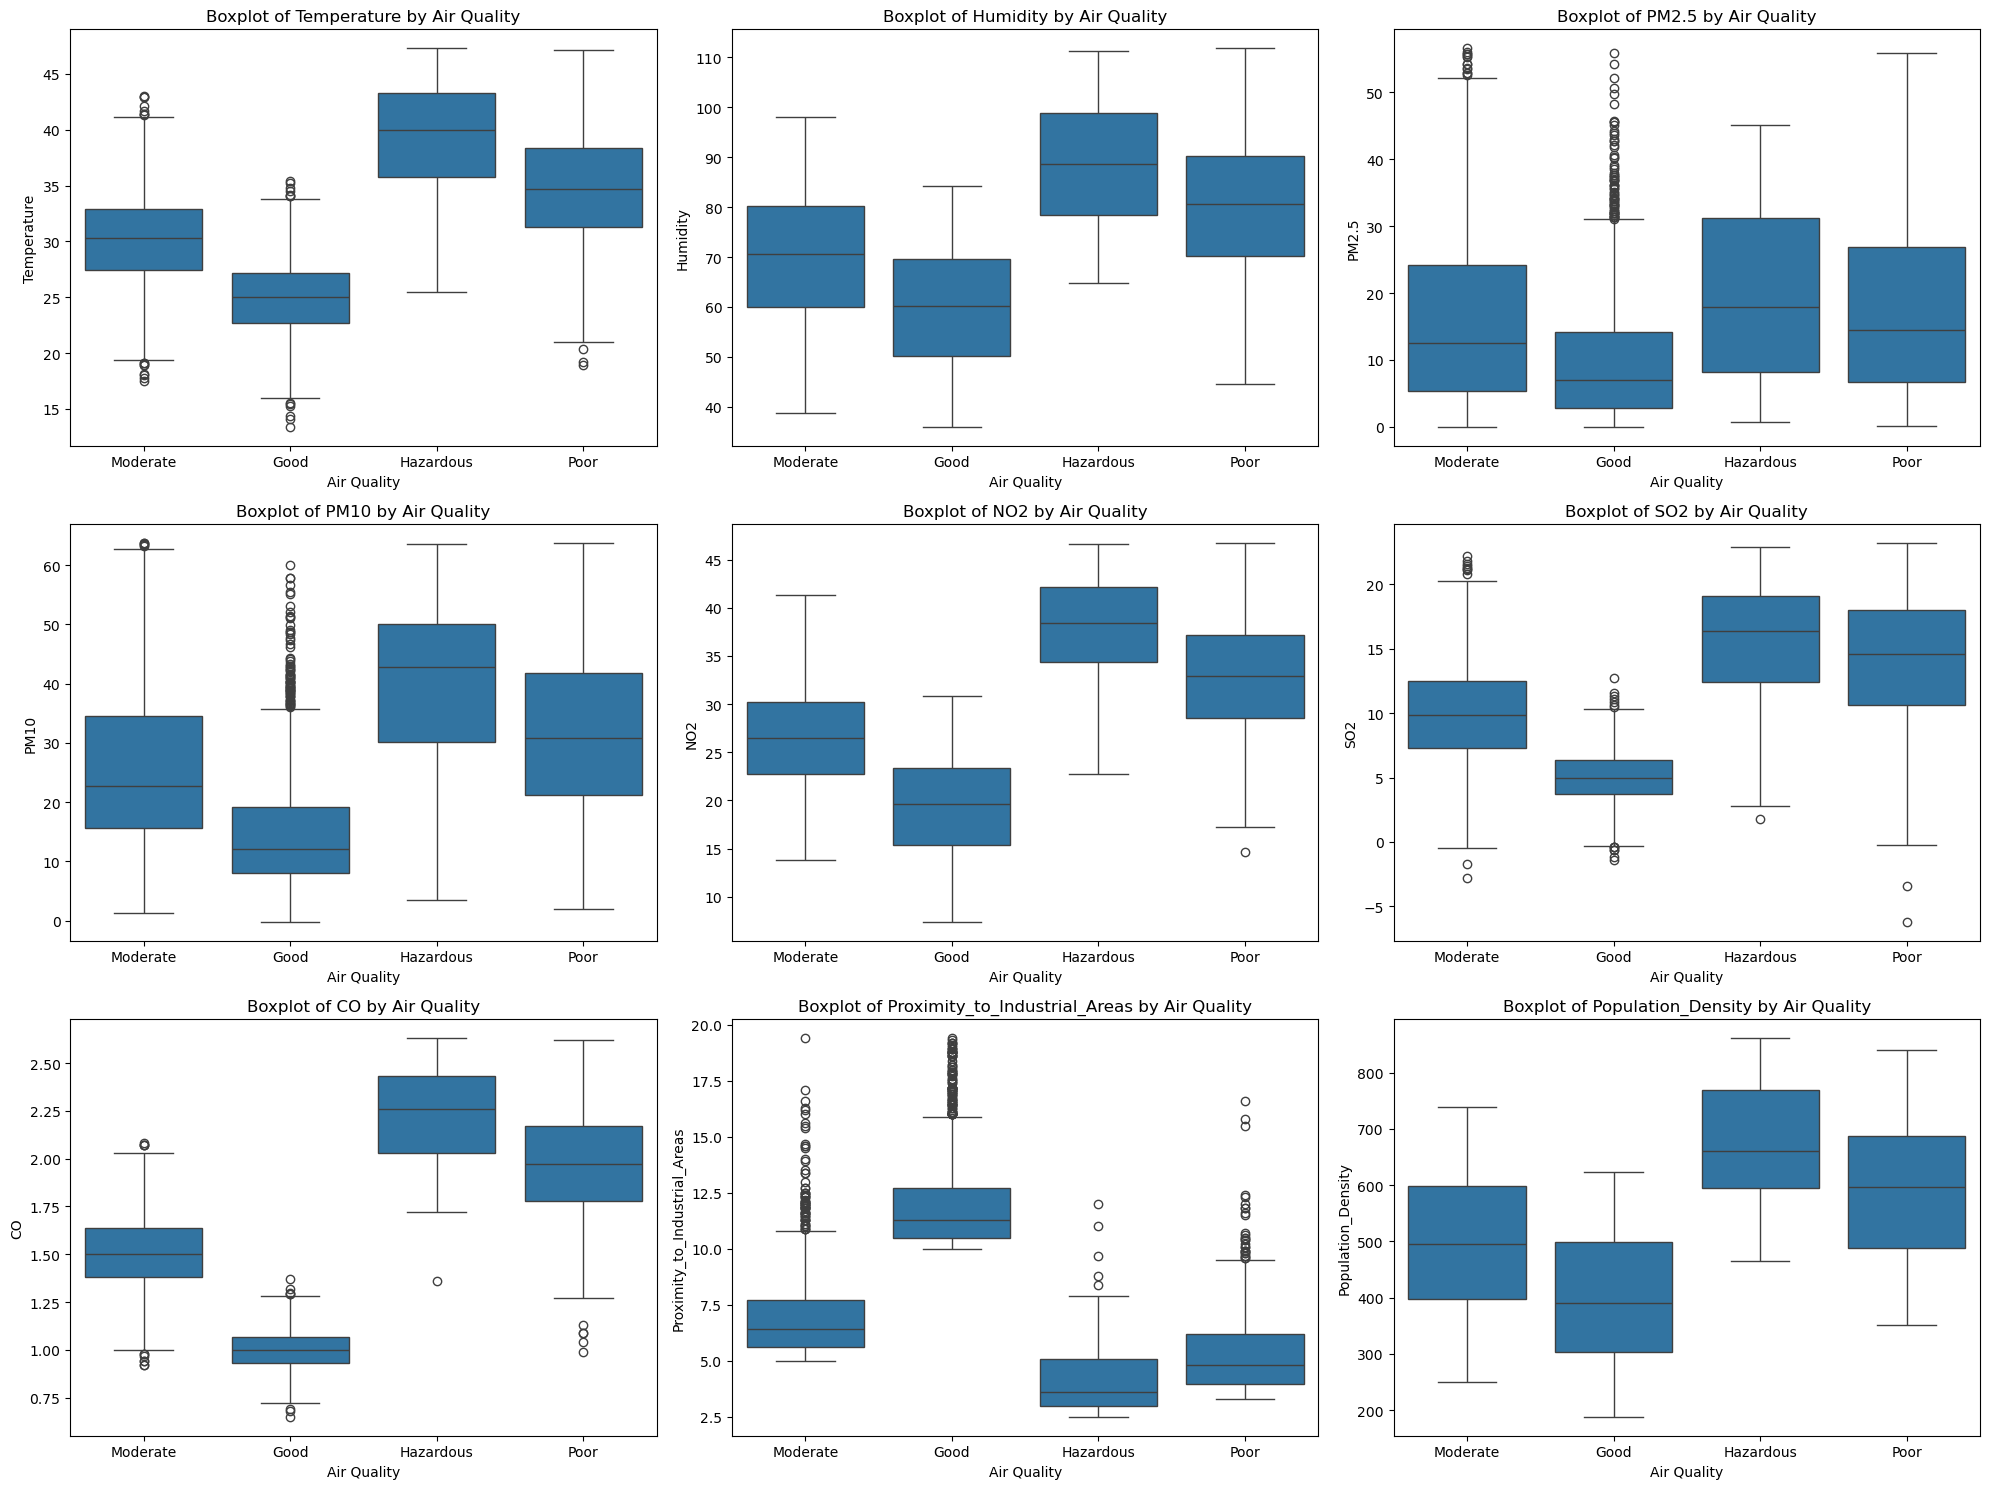

In [17]:
fig, ax = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
ax = ax.flatten()

for i, col in enumerate(cols):
    sns.boxplot(data=df, x='Air Quality', y=col, ax=ax[i])
    ax[i].set_title(f'Boxplot of {col} by Air Quality')
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])
    
plt.tight_layout()
plt.show()

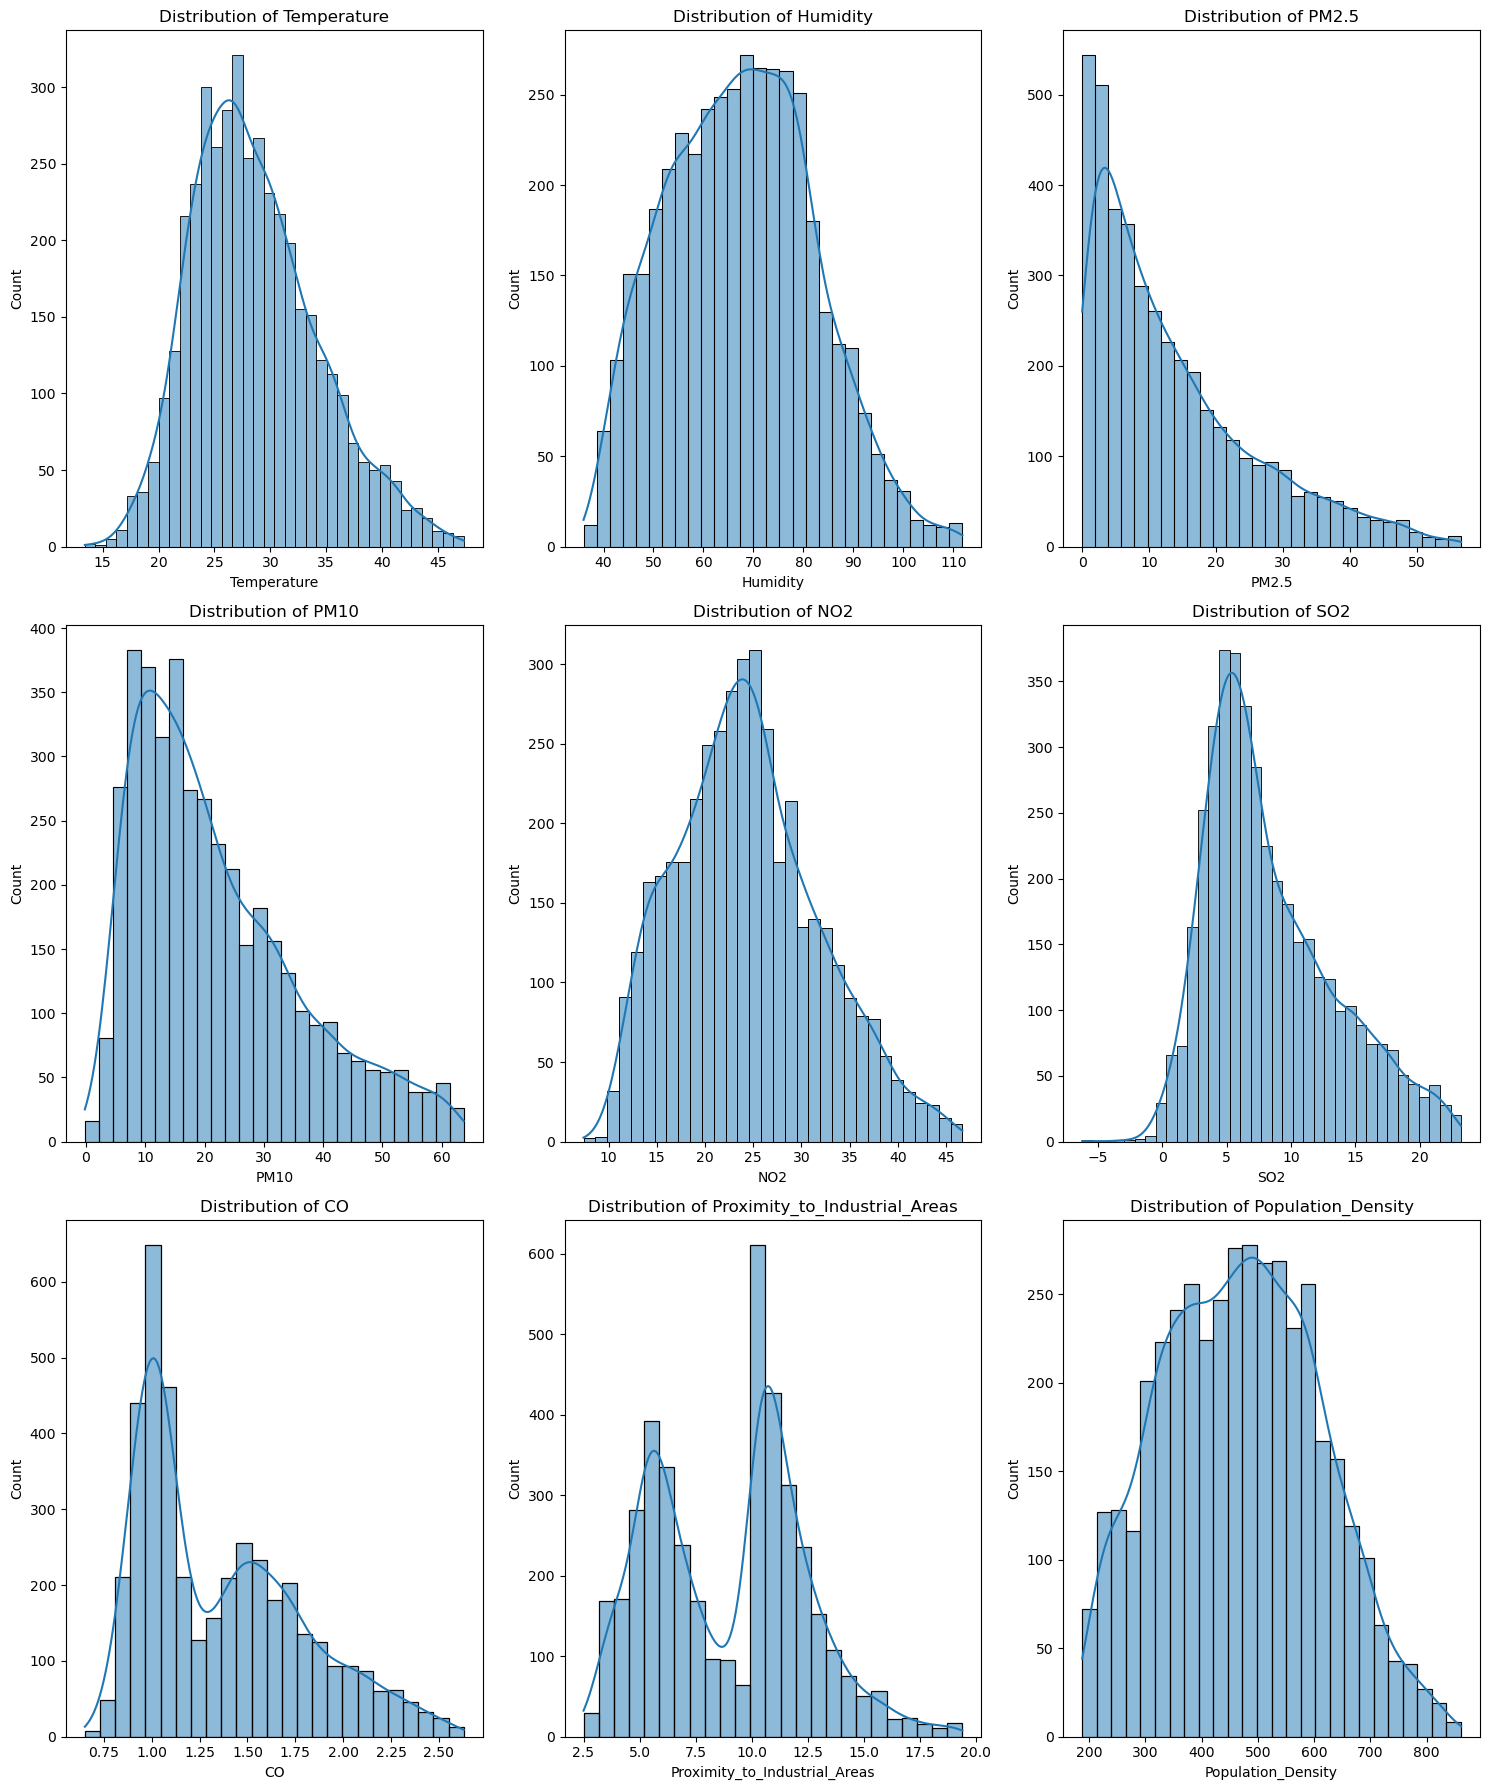

In [18]:
plt.figure(figsize=(15, 6 * num_rows))
for i, column in enumerate(cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

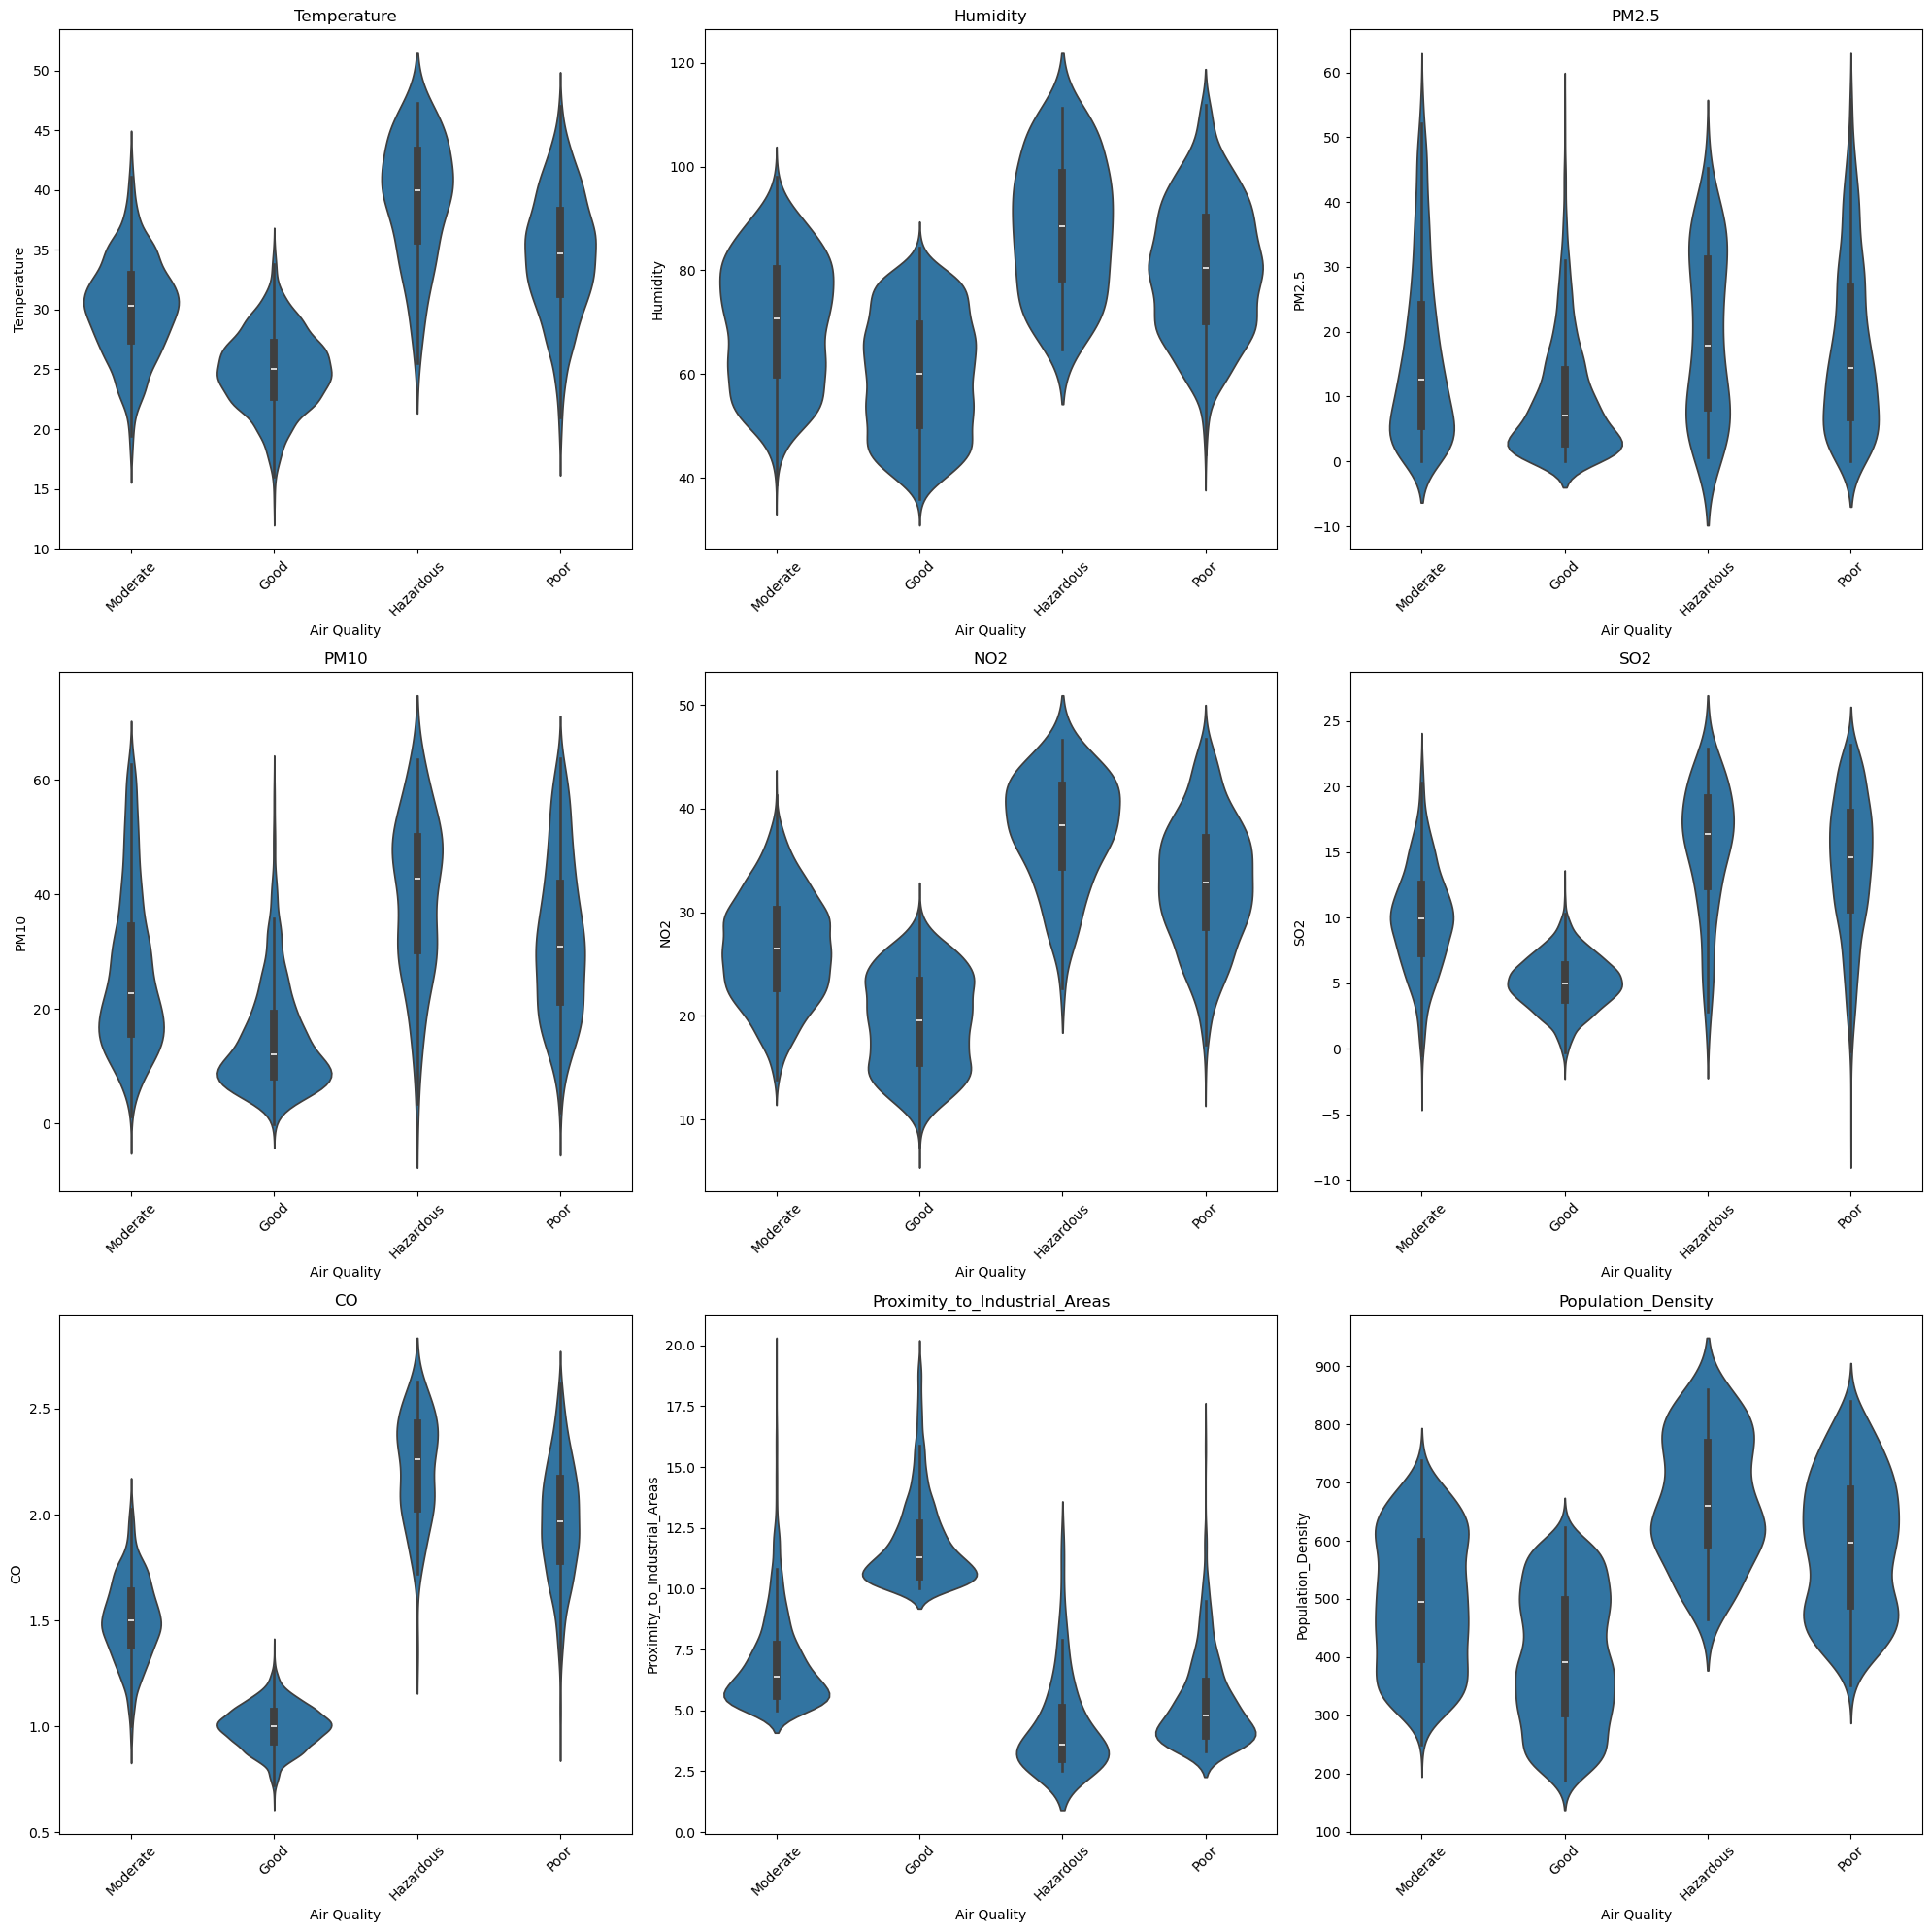

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.ravel()

for idx, col in enumerate(cols):
    sns.violinplot(data=df, y=col, x='Air Quality', ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Data Preprocessing and Transformation

## Feature Selection

### Feature Columns and Target Column

In [20]:
X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4158 non-null   float64
 1   Humidity                       4158 non-null   float64
 2   PM2.5                          4158 non-null   float64
 3   PM10                           4158 non-null   float64
 4   NO2                            4158 non-null   float64
 5   SO2                            4158 non-null   float64
 6   CO                             4158 non-null   float64
 7   Proximity_to_Industrial_Areas  4158 non-null   float64
 8   Population_Density             4158 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 324.8 KB


In [22]:
y.info()

<class 'pandas.core.series.Series'>
Index: 4158 entries, 0 to 4998
Series name: Air Quality
Non-Null Count  Dtype 
--------------  ----- 
4158 non-null   object
dtypes: object(1)
memory usage: 65.0+ KB


### Mutual Information

In [23]:
mi = mutual_info_classif(X,y)
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)
print(mi_df)

                         Feature  Mutual Information
0                             CO            0.789995
1  Proximity_to_Industrial_Areas            0.728381
2                            SO2            0.384165
3                            NO2            0.382984
4                    Temperature            0.338121
5             Population_Density            0.247141
6                       Humidity            0.220089
7                           PM10            0.178343
8                          PM2.5            0.052816


## Data Splitting

In [24]:
# Training + Validation Set 80% and Testing Set 20%
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
# Training Set 75% and Validation Set 25% (from 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=50)

In [25]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2494, 9)
X_val shape: (832, 9)
X_test shape: (832, 9)
y_train shape: (2494,)
y_val shape: (832,)
y_test shape: (832,)


## Transformation

In [26]:
df['Air Quality'] = df['Air Quality'].map({'Good': 0, 'Moderate': 1, 'Poor' : 2, 'Hazardous': 3 })
df['Air Quality'].value_counts()

Air Quality
0    1980
1    1389
2     700
3      89
Name: count, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4158 non-null   float64
 1   Humidity                       4158 non-null   float64
 2   PM2.5                          4158 non-null   float64
 3   PM10                           4158 non-null   float64
 4   NO2                            4158 non-null   float64
 5   SO2                            4158 non-null   float64
 6   CO                             4158 non-null   float64
 7   Proximity_to_Industrial_Areas  4158 non-null   float64
 8   Population_Density             4158 non-null   int64  
 9   Air Quality                    4158 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 357.3 KB


## Standardization

In [28]:
print("Before Scaling")
print("X_train:\n", X_train)
print("X_val:\n", X_val)
print("X_test:\n", X_test)

Before Scaling
X_train:
       Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
3280         44.0     111.0   20.6  39.6  34.3   6.6  1.95   
187          28.8      76.6   17.2  34.6  27.9   6.5  1.44   
4009         27.7      70.0   28.1  31.1  23.0   7.5  0.98   
3921         23.4      77.4   25.1  28.6  26.1   5.7  1.09   
556          34.3      77.6    6.9  14.1  29.1  17.0  1.87   
...           ...       ...    ...   ...   ...   ...   ...   
2649         35.0      56.0   23.4  27.1  32.7  11.5  1.62   
3231         22.6      76.7    1.2   6.5  20.9   6.7  1.22   
935          23.2      54.0    2.9   8.8  24.4   0.6  1.04   
1489         22.9      57.4   15.9  22.8  20.6   7.5  0.91   
854          26.9      59.1   21.4  33.0  22.2   9.2  1.14   

      Proximity_to_Industrial_Areas  Population_Density  
3280                            4.2                 741  
187                             5.4                 405  
4009                           10.0                 538 

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [30]:
print("After Scaling")
print("X_train:\n", X_train)
print("X_val:\n", X_val)
print("X_test:\n", X_test)

After Scaling
X_train:
 [[ 2.67476206  2.95393514  0.60648768 ...  1.38257563 -1.39812758
   1.90289313]
 [ 0.02872275  0.61578152  0.32230476 ...  0.18714292 -1.04958559
  -0.47568496]
 [-0.16276693  0.16718228  1.23336174 ... -0.89109051  0.28649201
   0.46583553]
 ...
 [-0.94613383 -0.92033103 -0.87293513 ... -0.75045137  1.01262114
  -0.70929531]
 [-0.99835829 -0.68923445  0.21364659 ... -1.05516951  0.40267267
  -0.96414296]
 [-0.30203216 -0.57368616  0.67335424 ... -0.5160528  -1.02054043
  -0.52523867]]
X_val:
 [[-0.65019522  0.58859369  2.98025082 ... -0.14101508 -0.46868229
   1.35780232]
 [ 0.13317167 -0.89994016 -0.34636091 ...  0.3043422   0.460763
  -0.47568496]
 [-0.2498077   1.1391473   0.33066308 ... -0.3519738   1.15784696
   0.47291463]
 ...
 [ 0.72504889  0.27593361  0.83216234 ...  0.91377849 -0.46868229
   1.13127107]
 [ 0.49874289  0.85367506  1.07455365 ... -0.3519738  -0.41059196
  -1.09864589]
 [ 0.15057983 -0.01633559 -0.68905207 ... -0.58637237  0.63503399
  

## Define Target Names

In [31]:
target_names = ['Good', 'Moderate', 'Poor', 'Hazardous']

# Model Training and Evaluation

## Define Function 

### Hyperparameter Selection

In [32]:
def grid_search(model, param_grid):

    # Define Grid Search
    search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

    # Train Model
    search.fit(X_train, y_train)

    # Summarize Result
    best_score = search.best_score_ * 100
    print(f'Best Score: {best_score:.2f}%')
    print(f'Best Hyperparameters: {search.best_params_}')

    # Best Model
    best_model = search.best_estimator_

    return best_model

### Model Training and Evaluation on Training Set

In [33]:
def evaluate_model_on_train(best_model):
    
    # Predictions on Training Set
    y_pred_train = best_model.predict(X_train)

    # Classification Report
    print("\nClassification Report for Training Set")
    print(classification_report(y_train, y_pred_train, target_names=target_names))

    # Specificity Calculation
    cm = confusion_matrix(y_train, y_pred_train)
    specificity_score = []    
    for i in range(len(cm)):
        tn = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
        fp = cm[:, i].sum() - cm[i, i]
        specificity_each = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificity_score.append(specificity_each)
    specificity = ( sum(specificity_score) / len(specificity_score) ) * 100

    # Metrics
    recall = recall_score(y_train, y_pred_train, average='weighted') * 100 # Sensitivity
    accuracy = accuracy_score(y_train, y_pred_train) * 100
    precision = precision_score(y_train, y_pred_train, average='weighted') * 100
    f1 = f1_score(y_train, y_pred_train, average='weighted') * 100

    # Display Metrics
    print(f'Sensitivity: {recall:.2f}%')
    print(f'Specificity: {specificity:.2f}%')
    print(f'Accuracy: {accuracy:.2f}%')
    print(f'Precision: {precision:.2f}%')
    print(f'F1-Score: {f1:.2f}%')

### Model Training and Evaluation on Validation Set

In [34]:
def evaluate_model_on_val(best_model):

    # Predictions on Validation Set
    y_pred_val = best_model.predict(X_val)

    # Classification Report
    print("\nClassification Report for Validation Set")
    print(classification_report(y_val, y_pred_val, target_names=target_names))
    
    # Specificity Calculation
    cm = confusion_matrix(y_val, y_pred_val)
    specificity_score = []    
    for i in range(len(cm)):
        tn = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
        fp = cm[:, i].sum() - cm[i, i]
        specificity_each = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificity_score.append(specificity_each)
    specificity = ( sum(specificity_score) / len(specificity_score) ) * 100
    
    # Metrics
    recall = recall_score(y_val, y_pred_val, average='weighted') * 100 # Sensitivity
    accuracy = accuracy_score(y_val, y_pred_val) * 100
    precision = precision_score(y_val, y_pred_val, average='weighted') * 100
    f1 = f1_score(y_val, y_pred_val, average='weighted') * 100
    
    # Display Metrics
    print(f'Sensitivity: {recall:.2f}%')
    print(f'Specificity: {specificity:.2f}%')
    print(f'Accuracy: {accuracy:.2f}%')
    print(f'Precision: {precision:.2f}%')
    print(f'F1-Score: {f1:.2f}%')

### Model Training and Evaluation on Testing Set

In [35]:
def evaluate_model_on_test(best_model):
    
    # Predictions on Testing Set
    y_pred_test = best_model.predict(X_test)

    # Classification Report
    print("\nClassification Report for Testing Set")
    print(classification_report(y_test, y_pred_test, target_names=target_names))

    # Specificity Calculation
    cm = confusion_matrix(y_test, y_pred_test)
    specificity_score = []    
    for i in range(len(cm)):
        tn = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
        fp = cm[:, i].sum() - cm[i, i]
        specificity_each = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificity_score.append(specificity_each)
    specificity = ( sum(specificity_score) / len(specificity_score) ) * 100

    # Metrics
    recall = recall_score(y_test, y_pred_test, average='weighted') * 100 # Sensitivity
    accuracy = accuracy_score(y_test, y_pred_test) * 100
    precision = precision_score(y_test, y_pred_test, average='weighted') * 100
    f1 = f1_score(y_test, y_pred_test, average='weighted') * 100

    # Display Metrics
    print(f'Sensitivity: {recall:.2f}%')
    print(f'Specificity: {specificity:.2f}%')
    print(f'Accuracy: {accuracy:.2f}%')
    print(f'Precision: {precision:.2f}%')
    print(f'F1-Score: {f1:.2f}%')

    # Set up the subplot for Confusion Matrix and ROC Curve
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(ax=ax[0], cmap='Blues')
    ax[0].set_title('Confusion Matrix')

    # ROC Curve (One-vs-Rest)
    y_test_bin = pd.get_dummies(y_test)
    y_pred_prob = lr_best_model.predict_proba(X_test)

    for i, label in enumerate(target_names):
        fpr, tpr, _ = roc_curve(y_test_bin.iloc[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        ax[1].plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

    ax[1].plot([0, 1], [0, 1], 'k--', lw=2)
    ax[1].set_title('ROC Curve')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].legend(loc='lower right')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    # Analyzing misclassifications
    # Identify misclassified instances
    misclassified_indices = np.where(y_test != y_pred_test)[0]
    misclassified_data = X_test[misclassified_indices]
    true_labels = y_test.iloc[misclassified_indices]
    predicted_labels = y_pred_test[misclassified_indices]
    
    # Create a DataFrame for misclassified instances
    misclassified_df = pd.DataFrame(misclassified_data, columns=df.drop('Air Quality', axis=1).columns)
    misclassified_df['True Label'] = true_labels.values
    misclassified_df['Predicted Label'] = predicted_labels
    
    misclassified_df.head()

    # Visualize misclassification distribution
    plt.figure(figsize=(10, 6))
    plt.hist([true_labels, predicted_labels], label=['True Labels', 'Predicted Labels'], bins=4, alpha=0.7)
    plt.title('Distribution of True vs Predicted Labels in Misclassified Cases')
    plt.xlabel('Air Quality Level')
    plt.ylabel('Count')
    plt.legend()
    plt.show()
    
    # Show confusion between classes
    print("Misclassification Pairs (True -> Predicted):")
    for true, pred in zip(true_labels, predicted_labels):
        print(f"True: {true} -> Predicted: {pred}")
    print("Total misclassifications:", len(misclassified_indices))

## Logistic Regression

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Score: 95.15%
Best Hyperparameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}

Classification Report for Training Set
              precision    recall  f1-score   support

        Good       0.99      1.00      1.00      1192
    Moderate       0.89      0.46      0.61        52
        Poor       0.94      0.96      0.95       807
   Hazardous       0.88      0.89      0.89       443

    accuracy                           0.96      2494
   macro avg       0.93      0.83      0.86      2494
weighted avg       0.96      0.96      0.95      2494

Sensitivity: 95.59%
Specificity: 98.48%
Accuracy: 95.59%
Precision: 95.53%
F1-Score: 95.42%

Classification Report for Validation Set
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       393
    Moderate       0.82      0.50      0.62        18
        Poor       0.94      0.96      0.95       298
   H

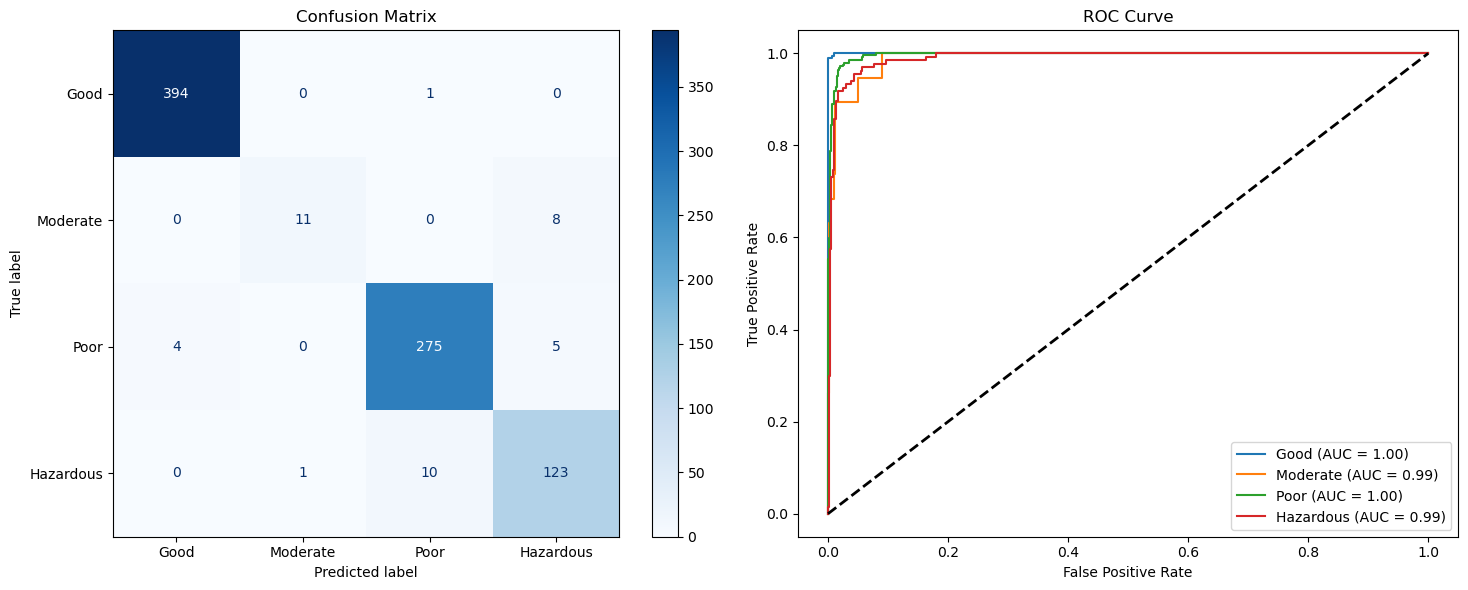

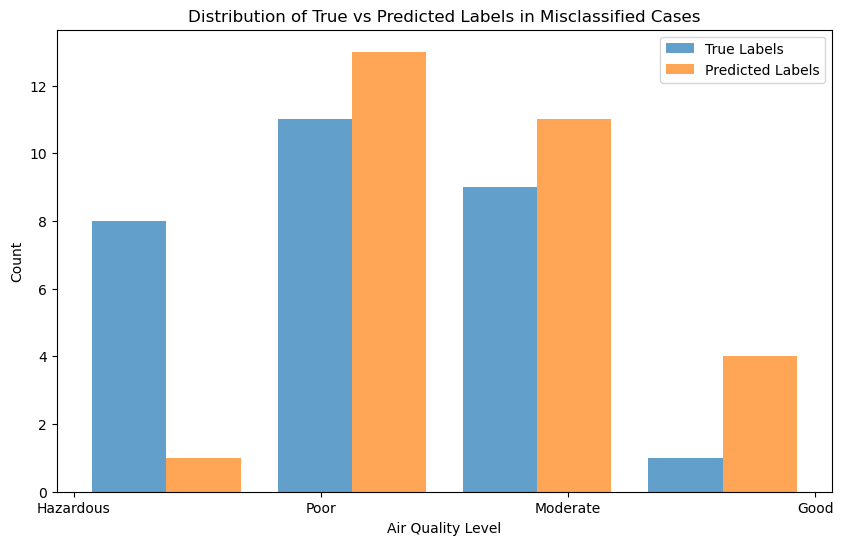

Misclassification Pairs (True -> Predicted):
True: Hazardous -> Predicted: Poor
True: Poor -> Predicted: Moderate
True: Hazardous -> Predicted: Poor
True: Poor -> Predicted: Moderate
True: Hazardous -> Predicted: Poor
True: Moderate -> Predicted: Good
True: Hazardous -> Predicted: Poor
True: Poor -> Predicted: Moderate
True: Moderate -> Predicted: Poor
True: Moderate -> Predicted: Good
True: Moderate -> Predicted: Good
True: Moderate -> Predicted: Poor
True: Good -> Predicted: Moderate
True: Moderate -> Predicted: Poor
True: Poor -> Predicted: Moderate
True: Hazardous -> Predicted: Poor
True: Hazardous -> Predicted: Poor
True: Poor -> Predicted: Hazardous
True: Moderate -> Predicted: Poor
True: Poor -> Predicted: Moderate
True: Hazardous -> Predicted: Poor
True: Moderate -> Predicted: Good
True: Poor -> Predicted: Moderate
True: Poor -> Predicted: Moderate
True: Hazardous -> Predicted: Poor
True: Moderate -> Predicted: Poor
True: Poor -> Predicted: Moderate
True: Poor -> Predicted: Mod

In [36]:
# Initialize Classifier
lr = LogisticRegression()

# Define Parameter Range
param_grid = {
    'solver' : ['newton-cg', 'liblinear'],
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': [1000, 2000],
}

lr_best_model = grid_search(lr, param_grid)
evaluate_model_on_train(lr_best_model)
evaluate_model_on_val(lr_best_model)
evaluate_model_on_test(lr_best_model)

## Support Vector Machine

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Score: 95.63%
Best Hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Classification Report for Training Set
              precision    recall  f1-score   support

        Good       0.99      1.00      1.00      1192
    Moderate       0.96      0.44      0.61        52
        Poor       0.95      0.97      0.96       807
   Hazardous       0.90      0.90      0.90       443

    accuracy                           0.96      2494
   macro avg       0.95      0.83      0.86      2494
weighted avg       0.96      0.96      0.96      2494

Sensitivity: 96.11%
Specificity: 98.66%
Accuracy: 96.11%
Precision: 96.11%
F1-Score: 95.91%

Classification Report for Validation Set
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       393
    Moderate       0.88      0.39      0.54        18
        Poor       0.94      0.97      0.96       298
   Hazardous       0.85      0

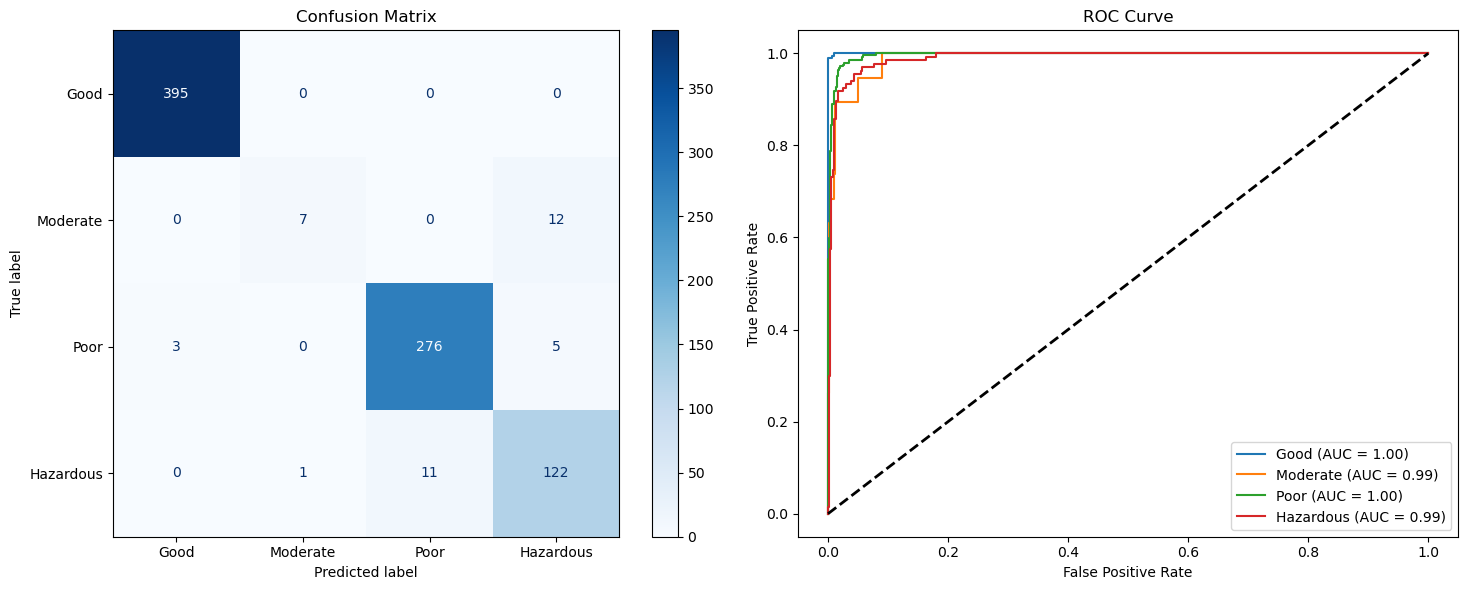

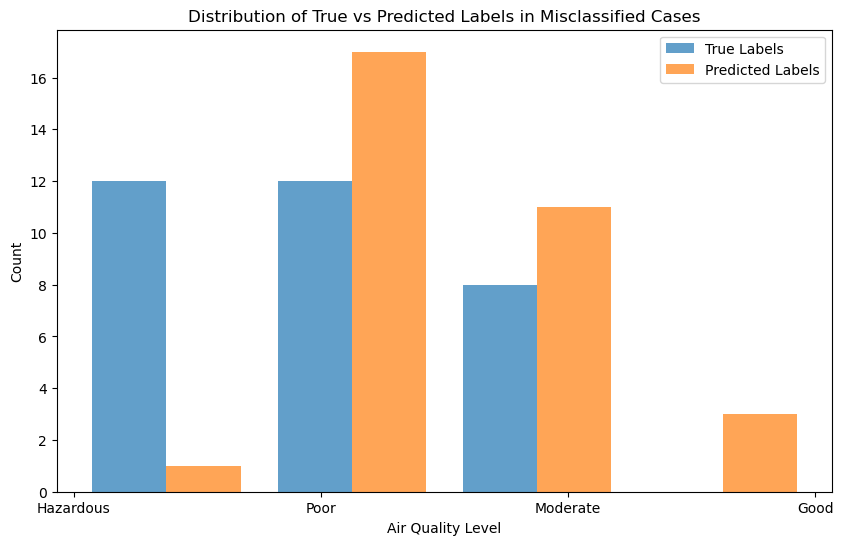

Misclassification Pairs (True -> Predicted):
True: Hazardous -> Predicted: Poor
True: Poor -> Predicted: Moderate
True: Hazardous -> Predicted: Poor
True: Hazardous -> Predicted: Poor
True: Hazardous -> Predicted: Poor
True: Poor -> Predicted: Moderate
True: Hazardous -> Predicted: Poor
True: Hazardous -> Predicted: Poor
True: Poor -> Predicted: Moderate
True: Moderate -> Predicted: Poor
True: Moderate -> Predicted: Good
True: Hazardous -> Predicted: Poor
True: Moderate -> Predicted: Good
True: Moderate -> Predicted: Poor
True: Poor -> Predicted: Moderate
True: Moderate -> Predicted: Poor
True: Poor -> Predicted: Moderate
True: Hazardous -> Predicted: Poor
True: Hazardous -> Predicted: Poor
True: Poor -> Predicted: Hazardous
True: Poor -> Predicted: Moderate
True: Moderate -> Predicted: Poor
True: Poor -> Predicted: Moderate
True: Moderate -> Predicted: Poor
True: Hazardous -> Predicted: Poor
True: Hazardous -> Predicted: Poor
True: Moderate -> Predicted: Good
True: Poor -> Predicted: 

In [37]:
# Initialize Classifier
sv = SVC(probability=True)

# Define Parameter Range
param_grid = {
    'C': [0.1, 1, 10], 
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['linear', 'rbf']
}

sv_best_model = grid_search(sv, param_grid)
evaluate_model_on_train(sv_best_model)
evaluate_model_on_val(sv_best_model)
evaluate_model_on_test(sv_best_model)

## Random Forest

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Score: 96.75%
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}

Classification Report for Training Set
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00      1192
    Moderate       0.97      0.73      0.84        52
        Poor       0.99      1.00      0.99       807
   Hazardous       0.97      0.98      0.97       443

    accuracy                           0.99      2494
   macro avg       0.98      0.93      0.95      2494
weighted avg       0.99      0.99      0.99      2494

Sensitivity: 98.92%
Specificity: 99.64%
Accuracy: 98.92%
Precision: 98.91%
F1-Score: 98.88%

Classification Report for Validation Set
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       393
    Moderate       0.89      0.44      0.59        18
        Poor       0.95      0.98      

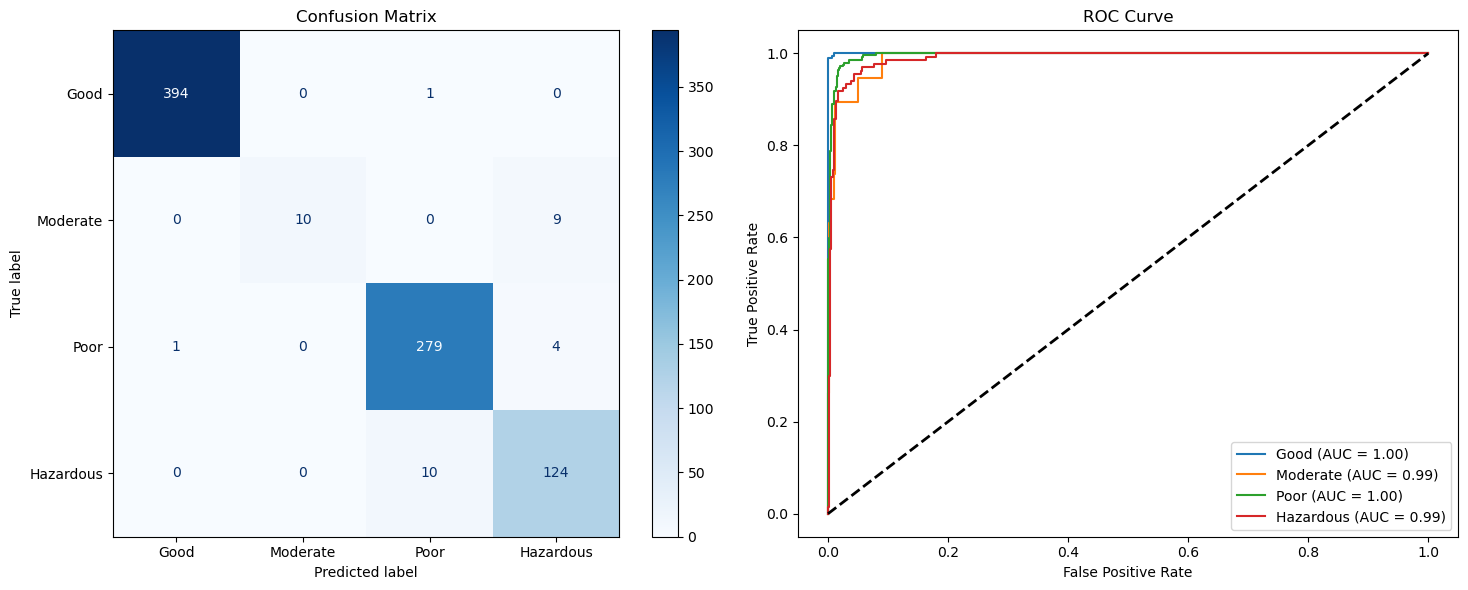

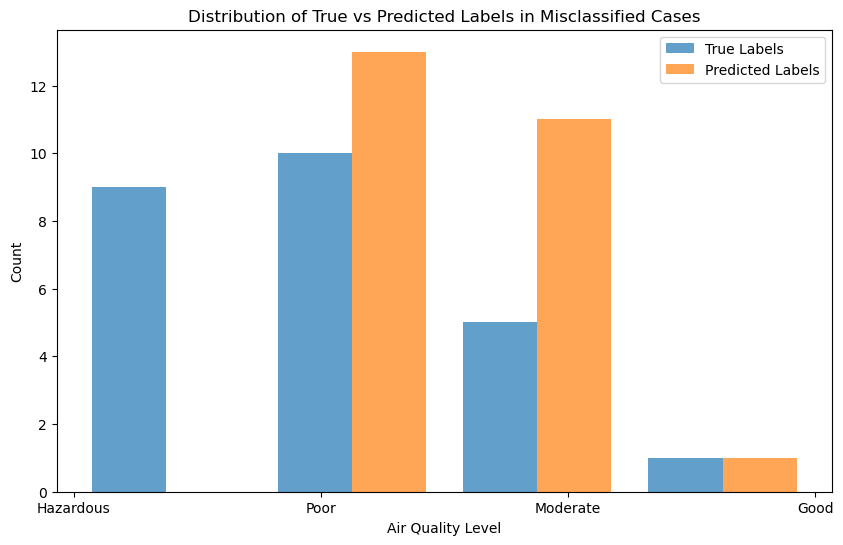

Misclassification Pairs (True -> Predicted):
True: Hazardous -> Predicted: Poor
True: Hazardous -> Predicted: Poor
True: Poor -> Predicted: Moderate
True: Poor -> Predicted: Moderate
True: Moderate -> Predicted: Poor
True: Moderate -> Predicted: Poor
True: Moderate -> Predicted: Good
True: Poor -> Predicted: Moderate
True: Hazardous -> Predicted: Poor
True: Poor -> Predicted: Moderate
True: Hazardous -> Predicted: Poor
True: Hazardous -> Predicted: Poor
True: Poor -> Predicted: Moderate
True: Hazardous -> Predicted: Poor
True: Moderate -> Predicted: Poor
True: Poor -> Predicted: Moderate
True: Moderate -> Predicted: Poor
True: Poor -> Predicted: Moderate
True: Hazardous -> Predicted: Poor
True: Hazardous -> Predicted: Poor
True: Hazardous -> Predicted: Poor
True: Poor -> Predicted: Moderate
True: Poor -> Predicted: Moderate
True: Poor -> Predicted: Moderate
True: Good -> Predicted: Moderate
Total misclassifications: 25


In [38]:
# Initialize Classifier
rf = RandomForestClassifier()

# Define Parameter Range
param_grid = {
    'criterion':['gini','entropy'],
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10],
}

rf_best_model = grid_search(rf, param_grid)
evaluate_model_on_train(rf_best_model)
evaluate_model_on_val(rf_best_model)
evaluate_model_on_test(rf_best_model)

# Conclusion

In [39]:
metrics_dict = {}

models = {
    'Logistic Regression': lr_best_model,
    'Support Vector Machine': sv_best_model,
    'Random Forest': rf_best_model,
}

for model_name, model in models.items():
    y_pred_test = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred_test, average='weighted') * 100 # Sensitivity
    accuracy = accuracy_score(y_test, y_pred_test) * 100
    precision = precision_score(y_test, y_pred_test, average='weighted') * 100
    f1 = f1_score(y_test, y_pred_test, average='weighted') * 100
    
    cm = confusion_matrix(y_test, y_pred_test)
    specificity_score = []    
    for i in range(len(cm)):
        tn = cm.sum() - cm[i, :].sum() - cm[:, i].sum() + cm[i, i]
        fp = cm[:, i].sum() - cm[i, i]
        specificity_each = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificity_score.append(specificity_each)
    specificity = ( sum(specificity_score) / len(specificity_score) ) * 100
    
    metrics_dict[model_name] = {
        'Sensitivity': f'{recall:.2f}%',
        'Specificity': f'{specificity:.2f}%',
        'Accuracy': f'{accuracy:.2f}%',
        'Precision': f'{precision:.2f}%',
        'F1-Score': f'{f1:.2f}%',
    }
metrics_df = pd.DataFrame(metrics_dict)
metrics_df

Logistic Regression Support Vector Machine Random Forest
Sensitivity              96.51%                 96.15%        97.00%
Specificity              98.77%                 98.69%        98.98%
Accuracy                 96.51%                 96.15%        97.00%
Precision                96.48%                 96.08%        97.06%
F1-Score                 96.41%                 95.87%        96.85%

In [40]:
metrics_df = pd.DataFrame(metrics_dict).T
best_model = metrics_df['Sensitivity'].idxmax()
print('Best Air Quality Level Prediction Model by Sensitivity')
metrics_df.loc[best_model]

Best Air Quality Level Prediction Model by Sensitivity


Sensitivity    97.00%
Specificity    98.98%
Accuracy       97.00%
Precision      97.06%
F1-Score       96.85%
Name: Random Forest, dtype: object

In [41]:
metrics_df = pd.DataFrame(metrics_dict).T
best_model = metrics_df['Specificity'].idxmax()
print('Best Air Quality Level Prediction Model by Specificity')
metrics_df.loc[best_model]

Best Air Quality Level Prediction Model by Specificity


Sensitivity    97.00%
Specificity    98.98%
Accuracy       97.00%
Precision      97.06%
F1-Score       96.85%
Name: Random Forest, dtype: object

In [42]:
metrics_df = pd.DataFrame(metrics_dict).T
best_model = metrics_df['Accuracy'].idxmax()
print('Best Air Quality Level Prediction Model by Accuracy')
metrics_df.loc[best_model]

Best Air Quality Level Prediction Model by Accuracy


Sensitivity    97.00%
Specificity    98.98%
Accuracy       97.00%
Precision      97.06%
F1-Score       96.85%
Name: Random Forest, dtype: object

In [43]:
metrics_df = pd.DataFrame(metrics_dict).T
best_model = metrics_df['Precision'].idxmax()
print('Best Air Quality Level Prediction Model by Precision')
metrics_df.loc[best_model]

Best Air Quality Level Prediction Model by Precision


Sensitivity    97.00%
Specificity    98.98%
Accuracy       97.00%
Precision      97.06%
F1-Score       96.85%
Name: Random Forest, dtype: object

In [44]:
metrics_df = pd.DataFrame(metrics_dict).T
best_model = metrics_df['F1-Score'].idxmax()
print('Best Air Quality Level Prediction Model by F1-Score')
metrics_df.loc[best_model]

Best Air Quality Level Prediction Model by F1-Score


Sensitivity    97.00%
Specificity    98.98%
Accuracy       97.00%
Precision      97.06%
F1-Score       96.85%
Name: Random Forest, dtype: object